# LSTM model trained on Household Power Consumption Dataset - No cross validation

In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
values = values.astype('float64')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.740357  0.694252  0.426671  0.550494  0.695226  0.181857  0.345776   
2   0.536762  0.431901  0.234750  0.620518  0.424618  0.095088  0.216451   
3   0.566912  0.313037  0.202322  0.667476  0.311508  0.075051  0.627798   
4   0.218615  0.436748  0.232377  0.686364  0.428075  0.000000  0.218680   
5   0.568916  0.324670  0.182809  0.608808  0.319591  0.158084  0.216830   

    var7(t)  
1  0.536762  
2  0.566912  
3  0.218615  
4  0.568916  
5  0.407300  


In [ ]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)  
1   0.740357  0.694252  
2   0.536762  0.431901  
3   0.566912  0.313037  
4   0.218615  0.436748  
5   0.568916  0.324670  


In [ ]:
values = reframed.values
print(values)

[[0.91678642 0.13073198 0.3153853  ... 0.16396519 0.74035748 0.6942518 ]
 [0.6942518  0.42667057 0.55049373 ... 0.34577587 0.53676241 0.43190139]
 [0.43190139 0.23474981 0.62051772 ... 0.21645057 0.5669116  0.31303746]
 ...
 [0.29343625 0.16199721 0.58037729 ... 0.03782311 0.28158539 0.34179083]
 [0.34179083 0.14708326 0.54706415 ... 0.23519696 0.48701848 0.26107518]
 [0.26107518 0.0982707  0.63914907 ... 0.03518044 0.16851481 0.31977106]]


In [ ]:
len(values)

1441

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 50
# Splitting the data by a percentage
train, test = train_test_split(values, train_size=0.8, test_size=0.2, random_state=SEED, shuffle=False)
val, test = train_test_split(test, train_size=0.5, test_size=0.5, random_state=SEED, shuffle=False)

In [ ]:
# train = values[:27670, :]  # 80 percent
# test = values[27670:31129, :] # 10 percent
# val = values[31129:,:] # 10 percent

In [ ]:
print(train.shape)
print(test.shape)
print(val.shape)

(1152, 8)
(145, 8)
(144, 8)


###Split into training and test sets

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
val_X, val_y = val[:, :-1], val[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1152, 1, 7) (1152,) (145, 1, 7) (145,)


### Define the LSTM model architecture

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(Dropout(0.10))
    m1.add(Dense(1))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

### Train the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               43200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
36/36 - 8s - loss: 0.0635 - root_mean_squared_error: 0.2521 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0911 - 8s/epoch - 214ms/step
Epoch 2/100
36/36 - 0s - loss: 0.0161 - root_mean_squared_error: 0.1267 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0808 - 159ms/epoch - 4ms/step
Epoc

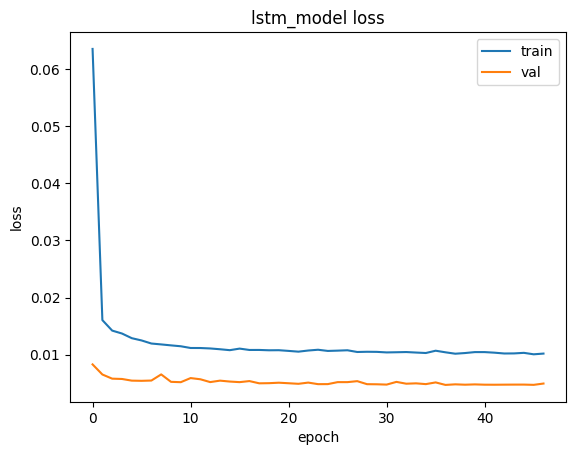

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# batch_size = 128
time_steps = train_X.shape[1]
number_of_rows = train_X.shape[0]
number_of_columns = train_X.shape[2]

model_path = '/content/drive/MyDrive/LSTM_By_Hour/lstm_model'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='train_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('lstm_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_y = lstm_model.predict(test_X)
rmse_test = np.sqrt(mean_squared_error(test_y, pred_y))
print(rmse_test)

5/5 [==============================] - 0s 3ms/step
0.08074901281937491


In [ ]:
lstm_model.evaluate(test_X,test_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.0065 - root_mean_squared_error: 0.0807


[0.006520402617752552, 0.08074901252985]

In [ ]:
pred_y_train = lstm_model.predict(train_X)
rmse_train = np.sqrt(mean_squared_error(train_y, pred_y_train))
rmse_train

36/36 [==============================] - 0s 3ms/step


0.0996596089717028

### From the above code cells,
#### Train RMSE = 0.0997
#### Validation RMSE = 0.0703
#### Test RMSE = 0.0807 **bold text**

### Plot the graph of learned and actual labels in testing stage

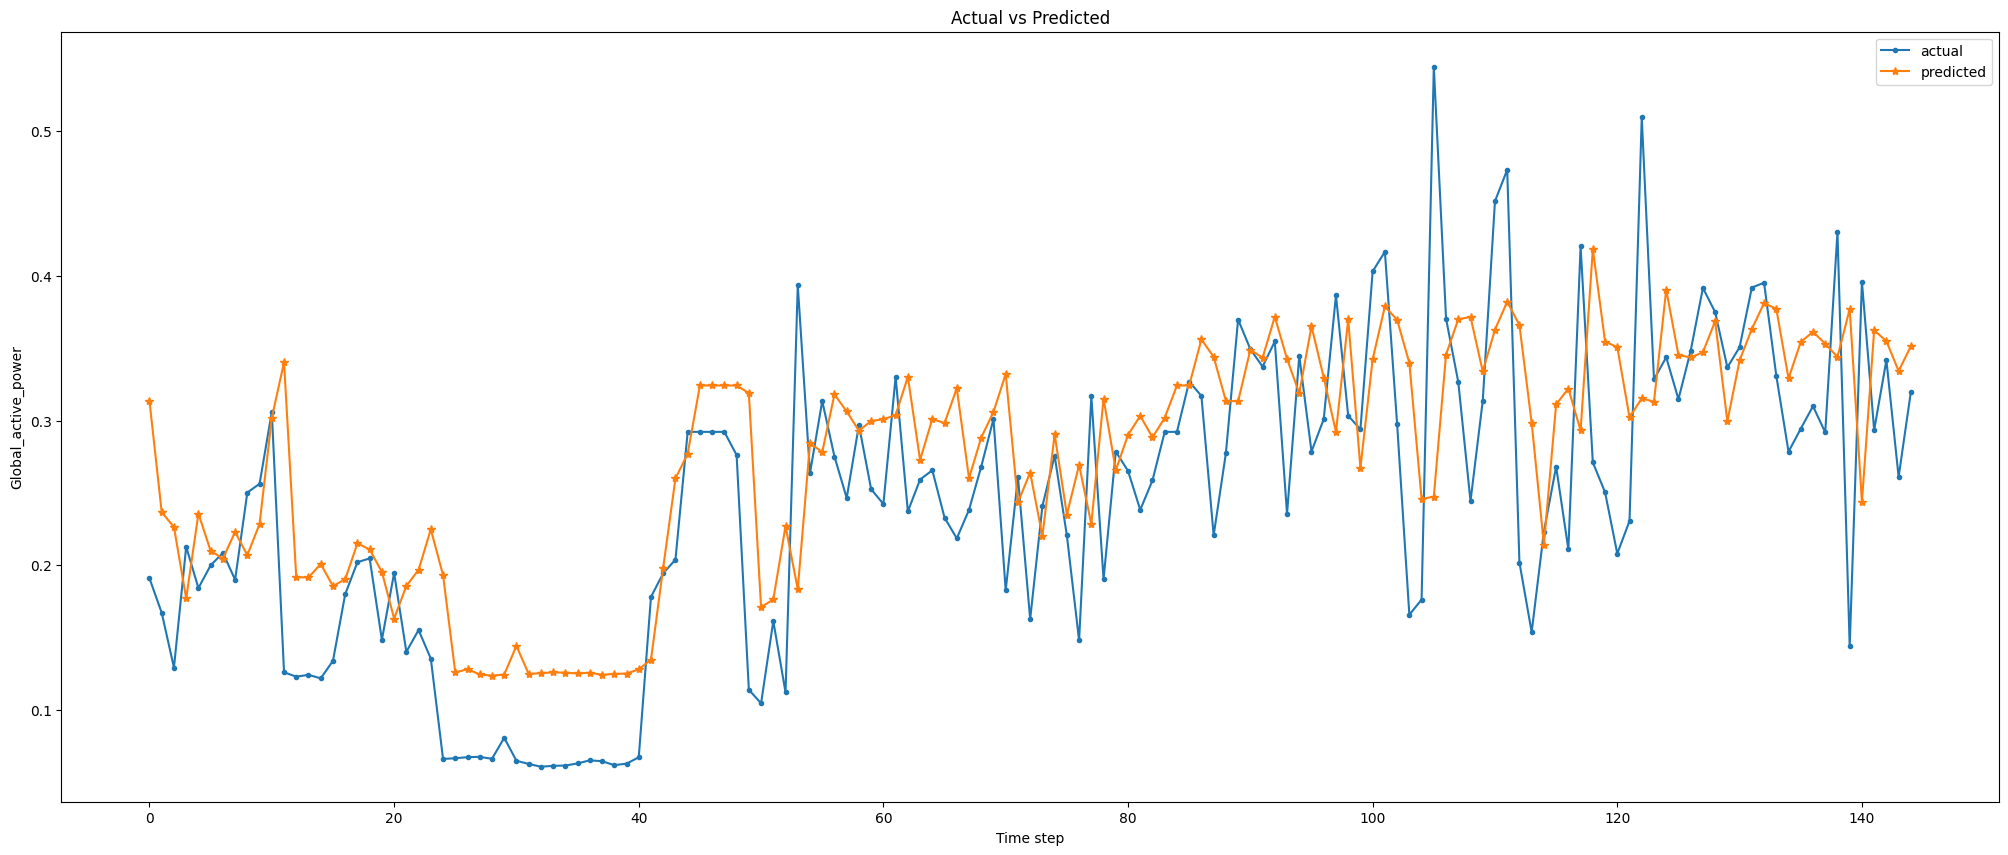

In [ ]:
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(pred_y)), pred_y[:], marker="*", label="predicted")
plt.legend()
plt.show()

In [ ]:
def calc_yhat_inverse(yhat,X):
  # invert scaling for forecast
  inv_yhat = np.concatenate((yhat, X[:, -6:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]
  return inv_yhat

def calc_y_inverse(X, y):
  # invert scaling for actual
  y = y.reshape((len(y), 1))
  inv_y = np.concatenate((y, X[:, -6:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]
  return inv_y

In [ ]:
test_X = test_X.reshape((test_X.shape[0], 7))

inv_y = calc_y_inverse(test_X,test_y)
inv_yhat = calc_yhat_inverse(pred_y,test_X)

In [ ]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.
def plot(inv_y, inv_yhat, size, title):
  import matplotlib.pyplot as plt
  fig_verify = plt.figure(figsize=(25,10))
  aa=[x for x in range(size)]
  plt.plot(aa, inv_y[:size], marker='.', label="actual")
  plt.plot(aa, inv_yhat[:size], 'r', marker='*', label="predicted")
  plt.ylabel('Global_active_power')
  plt.xlabel('Time step')
  plt.title(title)
  plt.legend()
  plt.show()

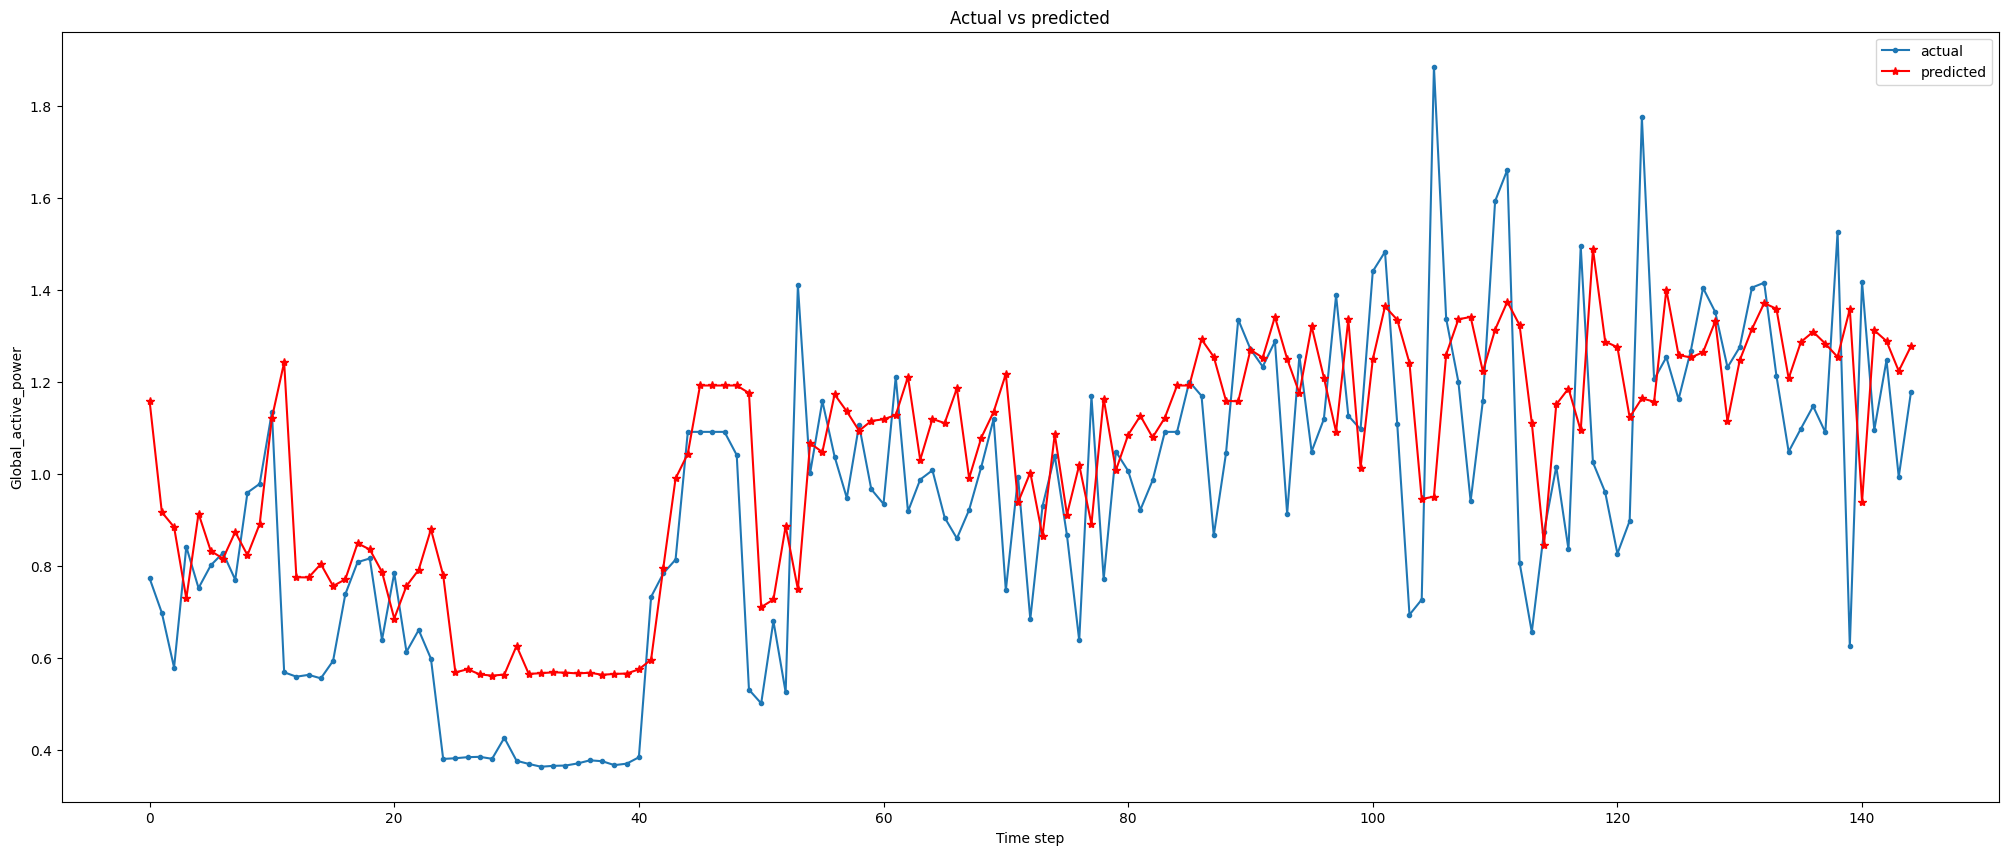

In [ ]:
plot(inv_y,inv_yhat,len(test_X),"Actual vs predicted")

#### To reproduce the graphs if needed

In [ ]:
print(test_y)

[0.19095185 0.16706197 0.12922366 0.21276482 0.18420601 0.199909
 0.20854646 0.18997552 0.25023082 0.25627934 0.30597583 0.1259666
 0.12293681 0.12419391 0.12178848 0.13387447 0.17993636 0.20210706
 0.20469644 0.14843178 0.19458211 0.140137   0.15521741 0.1353845
 0.06606239 0.06653905 0.06728103 0.06751273 0.06614596 0.08067807
 0.06479158 0.06260723 0.06067713 0.0612807  0.06149825 0.06295832
 0.06510154 0.06449222 0.06177196 0.06278808 0.06720453 0.17812786
 0.19443177 0.20388979 0.29219587 0.29219587 0.29219587 0.29219587
 0.27614766 0.11393986 0.10449719 0.16141848 0.11208139 0.39361427
 0.26366014 0.31354287 0.27514477 0.24647055 0.29692546 0.25252527
 0.24233798 0.33020406 0.23716541 0.2592428  0.26564949 0.23291919
 0.21852681 0.23829074 0.26818227 0.30107617 0.18262346 0.26096773
 0.16267559 0.240862   0.27576514 0.2205679  0.14797457 0.31671593
 0.19037392 0.27859197 0.26520908 0.2382651  0.2586756  0.29219587
 0.29219587 0.32693596 0.31706834 0.2206413  0.27735963 0.36987032

In [ ]:
print(pred_y)

[[0.31347603]
 [0.2366423 ]
 [0.22639376]
 [0.17700288]
 [0.23571783]
 [0.20987505]
 [0.20459643]
 [0.22300336]
 [0.20695555]
 [0.22853452]
 [0.30189303]
 [0.34031168]
 [0.19169351]
 [0.19154876]
 [0.20080012]
 [0.1856192 ]
 [0.19023293]
 [0.21515787]
 [0.21088696]
 [0.1953148 ]
 [0.16309944]
 [0.18564774]
 [0.19683367]
 [0.22481549]
 [0.19311342]
 [0.12586778]
 [0.12810847]
 [0.1244773 ]
 [0.1236656 ]
 [0.12438826]
 [0.1442349 ]
 [0.12480921]
 [0.12534517]
 [0.12593144]
 [0.12570924]
 [0.12518242]
 [0.12567201]
 [0.12424174]
 [0.12484103]
 [0.12509823]
 [0.12799492]
 [0.13475622]
 [0.19840449]
 [0.25996426]
 [0.27712497]
 [0.32426357]
 [0.32426357]
 [0.32426357]
 [0.32426357]
 [0.31905144]
 [0.17101273]
 [0.17631683]
 [0.2270383 ]
 [0.18337724]
 [0.28437686]
 [0.27821338]
 [0.31808457]
 [0.30634543]
 [0.29297954]
 [0.29975304]
 [0.3009203 ]
 [0.30378816]
 [0.33021   ]
 [0.2727711 ]
 [0.30112734]
 [0.29827917]
 [0.3223026 ]
 [0.26018074]
 [0.28829223]
 [0.30597425]
 [0.33216563]
 [0.24

# LSTM model trained on Household Power Consumption Dataset with 3-fold cross validation

In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
values = values.astype('float64')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.740357  0.694252  0.426671  0.550494  0.695226  0.181857  0.345776   
2   0.536762  0.431901  0.234750  0.620518  0.424618  0.095088  0.216451   
3   0.566912  0.313037  0.202322  0.667476  0.311508  0.075051  0.627798   
4   0.218615  0.436748  0.232377  0.686364  0.428075  0.000000  0.218680   
5   0.568916  0.324670  0.182809  0.608808  0.319591  0.158084  0.216830   

    var7(t)  
1  0.536762  
2  0.566912  
3  0.218615  
4  0.568916  
5  0.407300  


In [ ]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)  
1   0.740357  0.694252  
2   0.536762  0.431901  
3   0.566912  0.313037  
4   0.218615  0.436748  
5   0.568916  0.324670  


In [ ]:
values = reframed.values
print(values)

[[0.91678642 0.13073198 0.3153853  ... 0.16396519 0.74035748 0.6942518 ]
 [0.6942518  0.42667057 0.55049373 ... 0.34577587 0.53676241 0.43190139]
 [0.43190139 0.23474981 0.62051772 ... 0.21645057 0.5669116  0.31303746]
 ...
 [0.29343625 0.16199721 0.58037729 ... 0.03782311 0.28158539 0.34179083]
 [0.34179083 0.14708326 0.54706415 ... 0.23519696 0.48701848 0.26107518]
 [0.26107518 0.0982707  0.63914907 ... 0.03518044 0.16851481 0.31977106]]


In [ ]:
len(values)

1441

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 50
# Splitting the data by a percentage
train, test = train_test_split(values, train_size=0.9, test_size=0.1, random_state=SEED, shuffle=False)
# val, test = train_test_split(test, train_size=0.5, test_size=0.5, random_state=SEED, shuffle=False)

In [ ]:
# train = values[:27670, :]  # 80 percent
# test = values[27670:31129, :] # 10 percent
# val = values[31129:,:] # 10 percent

In [ ]:
print(train.shape)
print(test.shape)

(1296, 8)
(145, 8)


###Split into training and test sets

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1296, 1, 7) (1296,) (145, 1, 7) (145,)


### Define the LSTM model architecture

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(Dropout(0.10))
    m1.add(Dense(1))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

In [ ]:
def calc_yhat_inverse(yhat,X):
  # invert scaling for forecast
  inv_yhat = np.concatenate((yhat, X[:, -6:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]
  return inv_yhat

def calc_y_inverse(X, y):
  # invert scaling for actual
  y = y.reshape((len(y), 1))
  inv_y = np.concatenate((y, X[:, -6:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]
  return inv_y

### Train the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               43200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________
None
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
Fold 0:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  

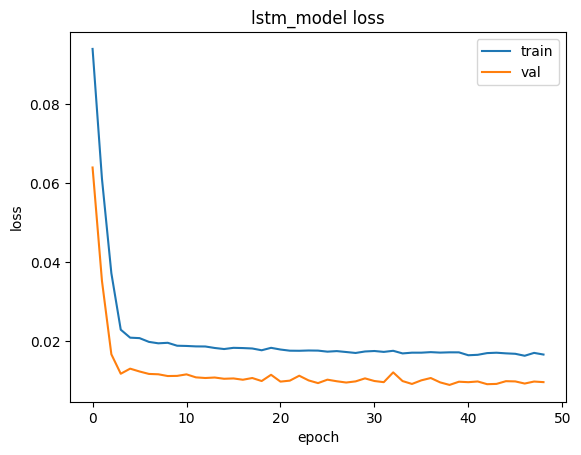

Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

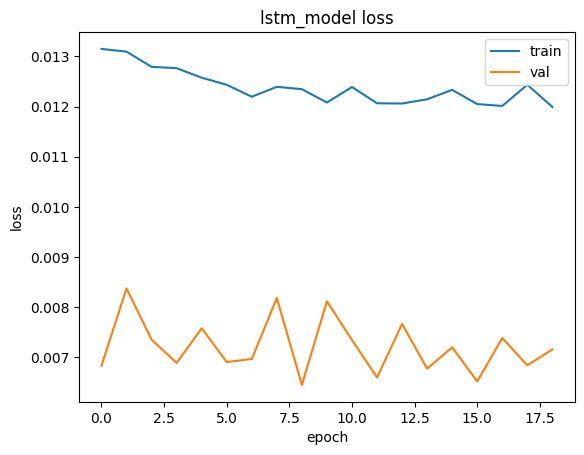

Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

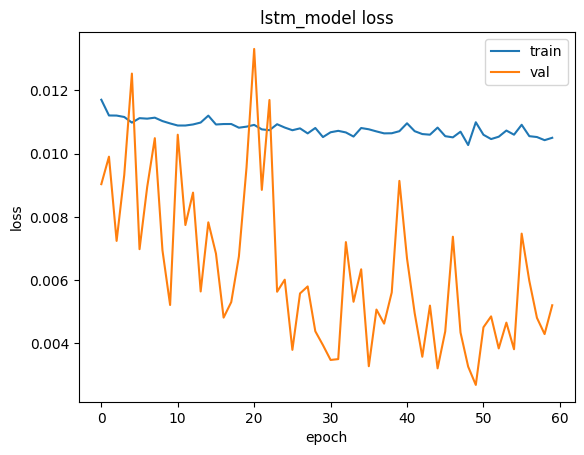

Train RMSE [0.12816402840750932, 0.10752282065213754, 0.1003913596340798]
Validation RMSE [0.09787545061343966, 0.08460065062581669, 0.07216324475392022]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = train_X.shape[1]
number_of_rows = train_X.shape[0]
number_of_columns = train_X.shape[2]

model_path = '/content/drive/MyDrive/LSTM_By_Hour/lstm_model_3_fold'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='3_fold_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse_train = []
rmse_val = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
print(tscv)
for i, (train_index, test_index) in enumerate(tscv.split(train_X)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")
  train_X = train[:train_index[-1], :-1]
  train_y = train[:train_index[-1], -1]
  train_X = train_X.reshape(train_X.shape[0], 1, 7)
  val_X = train[test_index[-1]:, :-1]
  val_y = train[test_index[-1]:, -1]
  val_X = val_X.reshape(val_X.shape[0], 1, 7)
  hist = lstm_model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), callbacks=my_callbacks, verbose=2)
  lstm_model.save(model_path)

  pred_y_train = lstm_model.predict(train_X)
  train_X = train_X.reshape((train_X.shape[0], 7))

  inv_y = calc_y_inverse(train_X, train_y)
  inv_yhat = calc_yhat_inverse(pred_y_train ,train_X)
  rmse_train.append(np.sqrt(mean_squared_error(train_y, pred_y_train)))

  pred_y_val = lstm_model.predict(val_X)
  val_X = val_X.reshape((val_X.shape[0], 7))

  inv_y = calc_y_inverse(val_X, val_y)
  inv_yhat = calc_yhat_inverse(pred_y_val, val_X)
  rmse_val.append(np.sqrt(mean_squared_error(val_y, pred_y_val)))

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('lstm_model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

print("Train RMSE", rmse_train)
print("Validation RMSE", rmse_val)

In [ ]:
print("Train RMSE", np.mean(rmse_train))
print("Validation RMSE", np.mean(rmse_val))

Train RMSE 0.11202606956457556
Validation RMSE 0.08487978199772551


### Evaluate the model


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_y_test = lstm_model.predict(test_X)
rmse_test = np.sqrt(mean_squared_error(test_y, pred_y_test))
print("Test RMSE", rmse_test)

5/5 [==============================] - 0s 3ms/step
Test RMSE 0.07638701281033734


In [ ]:
lstm_model.evaluate(test_X,test_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.0058 - root_mean_squared_error: 0.0764


[0.005837491247802973, 0.07640347629785538]

### From the above code cells,
#### Train RMSE = 0.1120
#### Validation RMSE = 0.0849
#### Test RMSE = 0.0764

### Plot the graph of learned and actual labels in testing stage

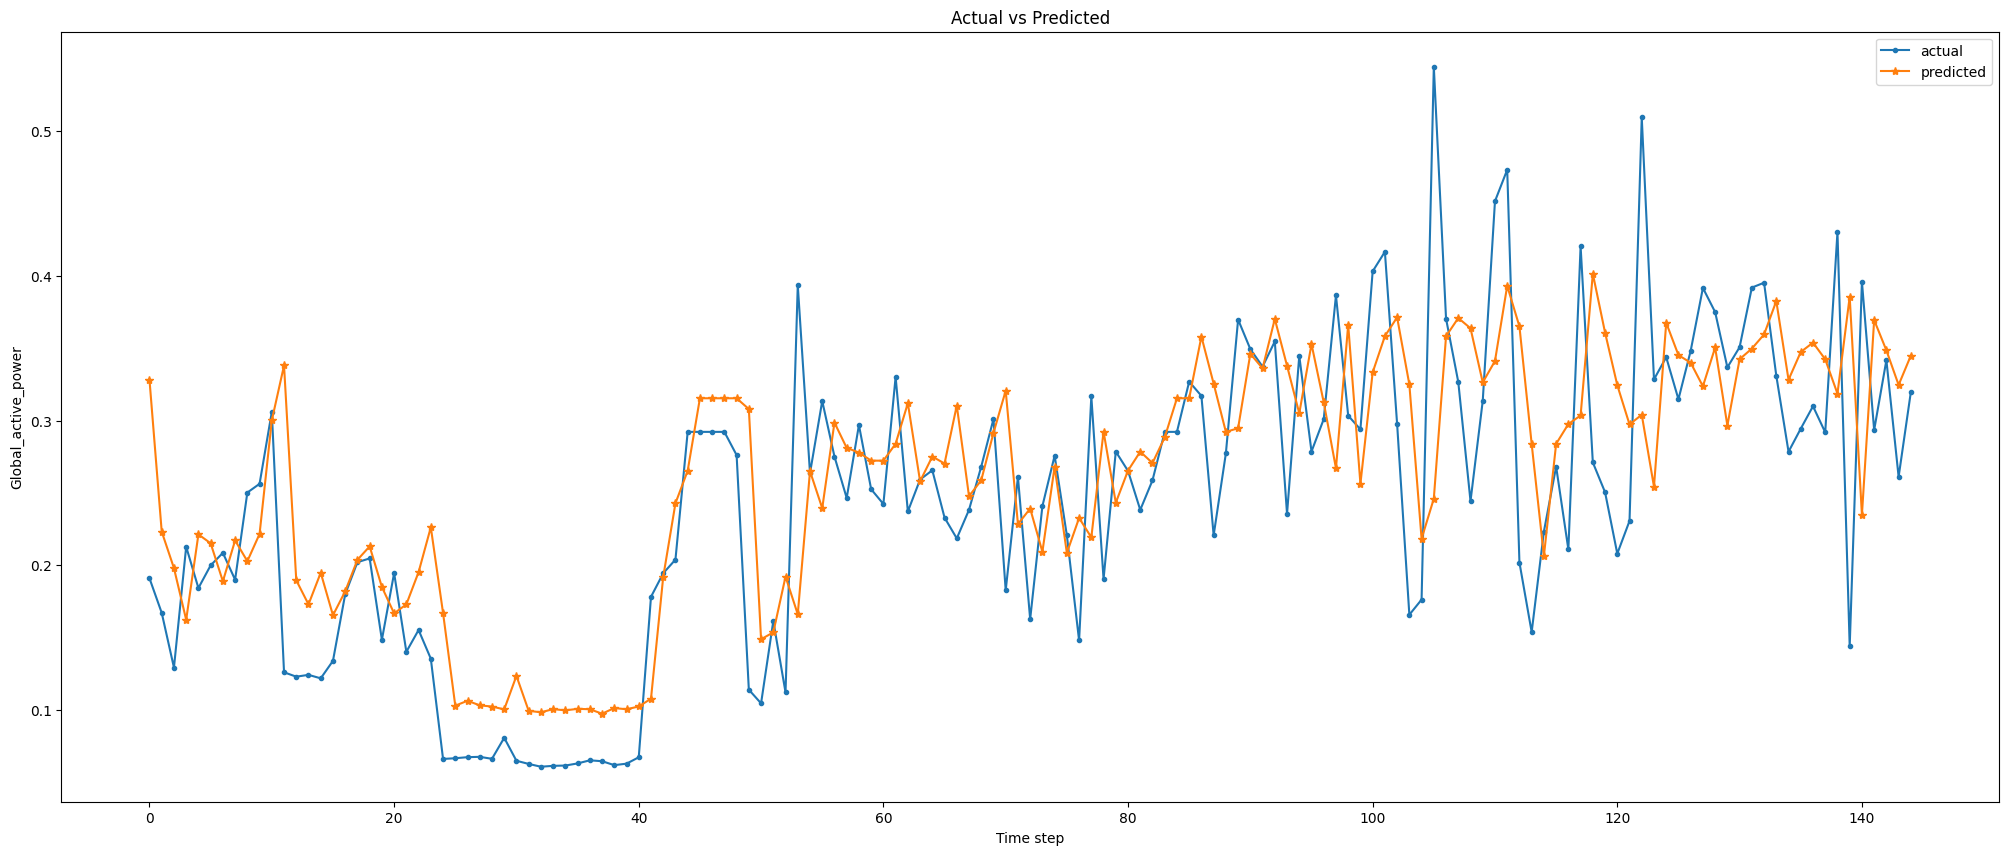

In [ ]:
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(pred_y_test)), pred_y_test[:], marker="*", label="predicted")
plt.legend()
plt.show()

In [ ]:
def calc_yhat_inverse(yhat,X):
  # invert scaling for forecast
  inv_yhat = np.concatenate((yhat, X[:, -6:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]
  return inv_yhat

def calc_y_inverse(X, y):
  # invert scaling for actual
  y = y.reshape((len(y), 1))
  inv_y = np.concatenate((y, X[:, -6:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]
  return inv_y

In [ ]:
test_X = test_X.reshape((test_X.shape[0], 7))

inv_y = calc_y_inverse(test_X,test_y)
inv_yhat = calc_yhat_inverse(pred_y_test,test_X)

In [ ]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.
def plot(inv_y, inv_yhat, size, title):
  import matplotlib.pyplot as plt
  fig_verify = plt.figure(figsize=(25,10))
  aa=[x for x in range(size)]
  plt.plot(aa, inv_y[:size], marker='.', label="actual")
  plt.plot(aa, inv_yhat[:size], 'r', marker='*', label="predicted")
  plt.ylabel('Global_active_power')
  plt.xlabel('Time step')
  plt.title(title)
  plt.legend()
  plt.show()

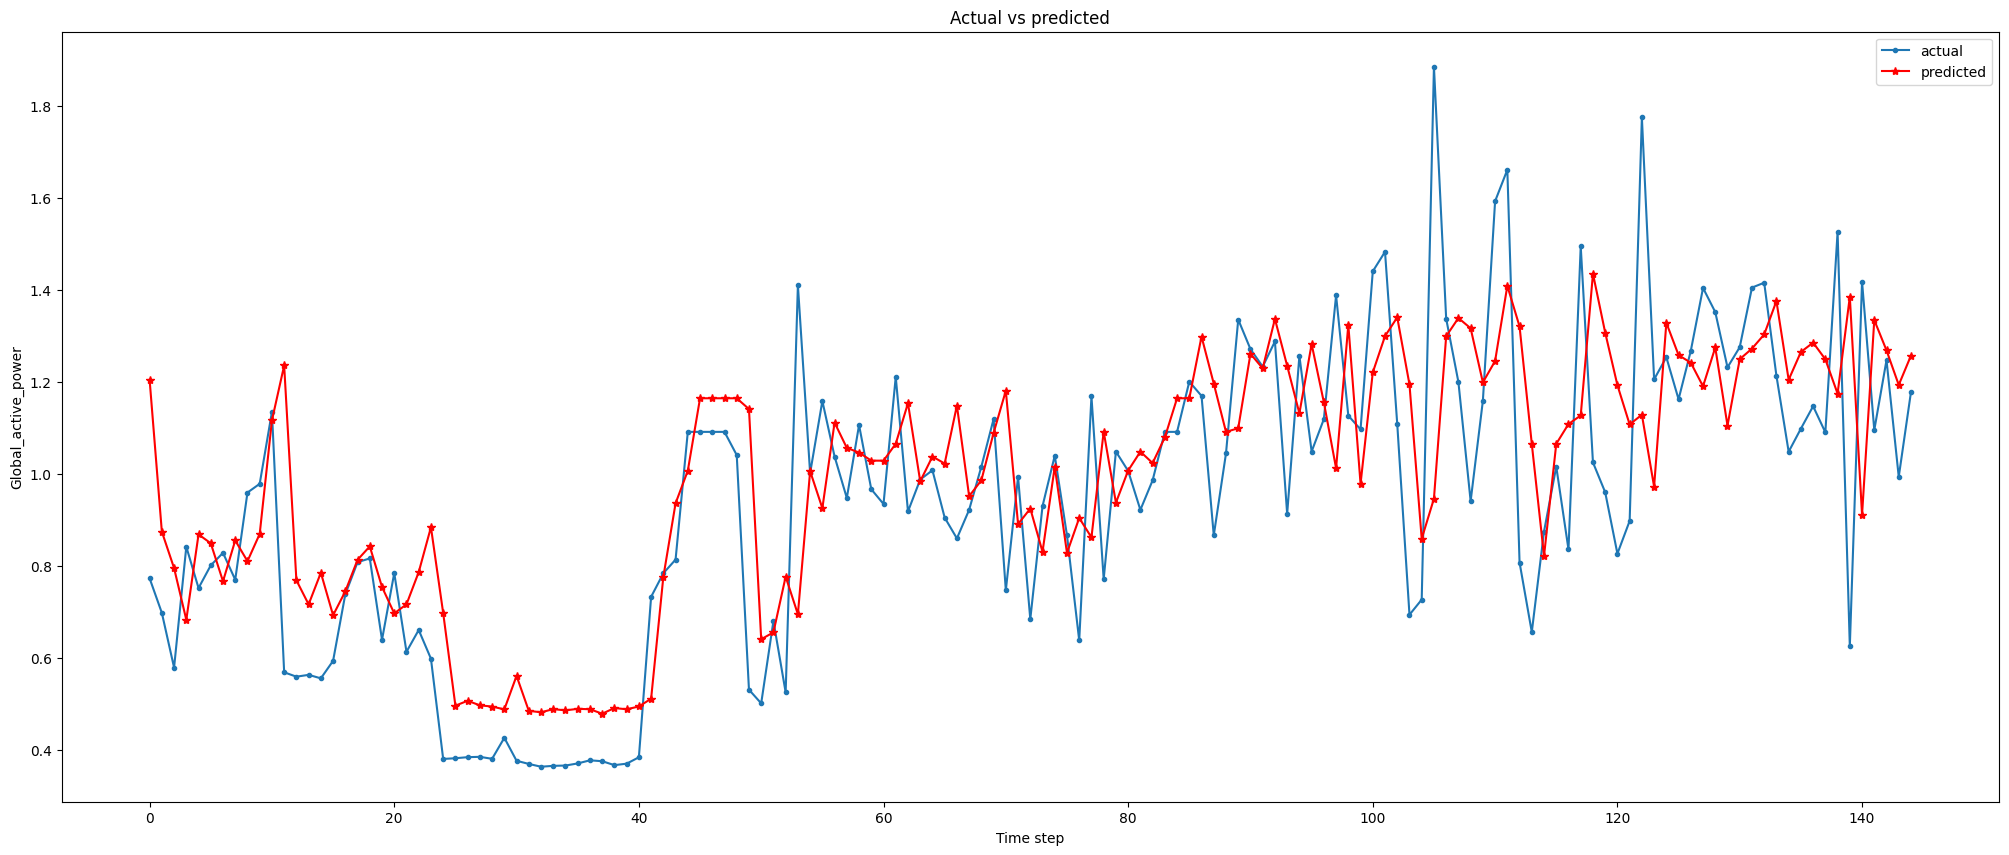

In [ ]:
plot(inv_y,inv_yhat,len(test_X),"Actual vs predicted")

#### To reproduce the graphs if needed

In [ ]:
print(test_y)

[0.19095185 0.16706197 0.12922366 0.21276482 0.18420601 0.199909
 0.20854646 0.18997552 0.25023082 0.25627934 0.30597583 0.1259666
 0.12293681 0.12419391 0.12178848 0.13387447 0.17993636 0.20210706
 0.20469644 0.14843178 0.19458211 0.140137   0.15521741 0.1353845
 0.06606239 0.06653905 0.06728103 0.06751273 0.06614596 0.08067807
 0.06479158 0.06260723 0.06067713 0.0612807  0.06149825 0.06295832
 0.06510154 0.06449222 0.06177196 0.06278808 0.06720453 0.17812786
 0.19443177 0.20388979 0.29219587 0.29219587 0.29219587 0.29219587
 0.27614766 0.11393986 0.10449719 0.16141848 0.11208139 0.39361427
 0.26366014 0.31354287 0.27514477 0.24647055 0.29692546 0.25252527
 0.24233798 0.33020406 0.23716541 0.2592428  0.26564949 0.23291919
 0.21852681 0.23829074 0.26818227 0.30107617 0.18262346 0.26096773
 0.16267559 0.240862   0.27576514 0.2205679  0.14797457 0.31671593
 0.19037392 0.27859197 0.26520908 0.2382651  0.2586756  0.29219587
 0.29219587 0.32693596 0.31706834 0.2206413  0.27735963 0.36987032

In [ ]:
print(pred_y_test)

[[0.3281937 ]
 [0.22322577]
 [0.1980031 ]
 [0.16226831]
 [0.22131145]
 [0.21515974]
 [0.18886477]
 [0.21712941]
 [0.20278025]
 [0.22162506]
 [0.30008307]
 [0.33809534]
 [0.1895932 ]
 [0.1729244 ]
 [0.19479737]
 [0.16539535]
 [0.18192792]
 [0.20373064]
 [0.21303001]
 [0.18496765]
 [0.16669989]
 [0.17293124]
 [0.19523336]
 [0.22624609]
 [0.16700283]
 [0.10290102]
 [0.10626913]
 [0.10312147]
 [0.10227841]
 [0.10032349]
 [0.12348442]
 [0.09931313]
 [0.09831418]
 [0.1004902 ]
 [0.09964608]
 [0.10069904]
 [0.10042568]
 [0.09734671]
 [0.10123876]
 [0.10040054]
 [0.10232926]
 [0.10768334]
 [0.19192323]
 [0.24282041]
 [0.26531085]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3154359 ]
 [0.3079798 ]
 [0.14882937]
 [0.15356198]
 [0.19210601]
 [0.16608521]
 [0.26504496]
 [0.23940364]
 [0.29861358]
 [0.28111166]
 [0.2779222 ]
 [0.27229685]
 [0.27228355]
 [0.2839849 ]
 [0.3120502 ]
 [0.2580373 ]
 [0.27513522]
 [0.27030936]
 [0.31041113]
 [0.24771494]
 [0.2587304 ]
 [0.2914718 ]
 [0.32065186]
 [0.22

# LSTM model trained on Household Power Consumption Dataset with 5-fold cross validation

In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
values = values.astype('float64')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.740357  0.694252  0.426671  0.550494  0.695226  0.181857  0.345776   
2   0.536762  0.431901  0.234750  0.620518  0.424618  0.095088  0.216451   
3   0.566912  0.313037  0.202322  0.667476  0.311508  0.075051  0.627798   
4   0.218615  0.436748  0.232377  0.686364  0.428075  0.000000  0.218680   
5   0.568916  0.324670  0.182809  0.608808  0.319591  0.158084  0.216830   

    var7(t)  
1  0.536762  
2  0.566912  
3  0.218615  
4  0.568916  
5  0.407300  


In [ ]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)  
1   0.740357  0.694252  
2   0.536762  0.431901  
3   0.566912  0.313037  
4   0.218615  0.436748  
5   0.568916  0.324670  


In [ ]:
values = reframed.values
print(values)

[[0.91678642 0.13073198 0.3153853  ... 0.16396519 0.74035748 0.6942518 ]
 [0.6942518  0.42667057 0.55049373 ... 0.34577587 0.53676241 0.43190139]
 [0.43190139 0.23474981 0.62051772 ... 0.21645057 0.5669116  0.31303746]
 ...
 [0.29343625 0.16199721 0.58037729 ... 0.03782311 0.28158539 0.34179083]
 [0.34179083 0.14708326 0.54706415 ... 0.23519696 0.48701848 0.26107518]
 [0.26107518 0.0982707  0.63914907 ... 0.03518044 0.16851481 0.31977106]]


In [ ]:
len(values)

1441

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 50
# Splitting the data by a percentage
train, test = train_test_split(values, train_size=0.9, test_size=0.1, random_state=SEED, shuffle=False)

In [ ]:
# train = values[:27670, :]  # 80 percent
# test = values[27670:31129, :] # 10 percent
# val = values[31129:,:] # 10 percent

In [ ]:
print(train.shape)
print(test.shape)

(1296, 8)
(145, 8)


###Split into training and test sets

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1296, 1, 7) (1296,) (145, 1, 7) (145,)


### Define the LSTM model architecture

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(Dropout(0.10))
    m1.add(Dense(1))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

### Train the model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               43200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________
None
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Fold 0:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52

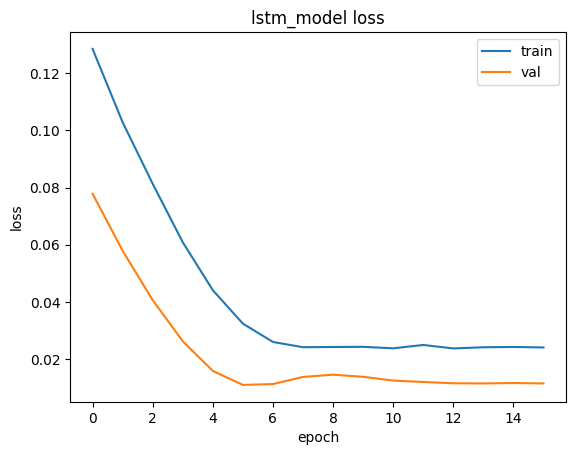

Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

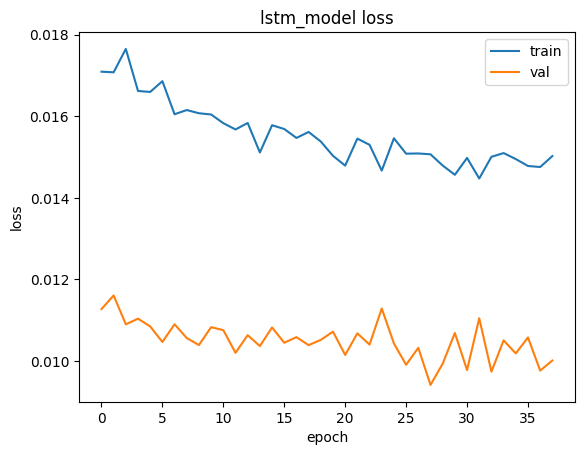

Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

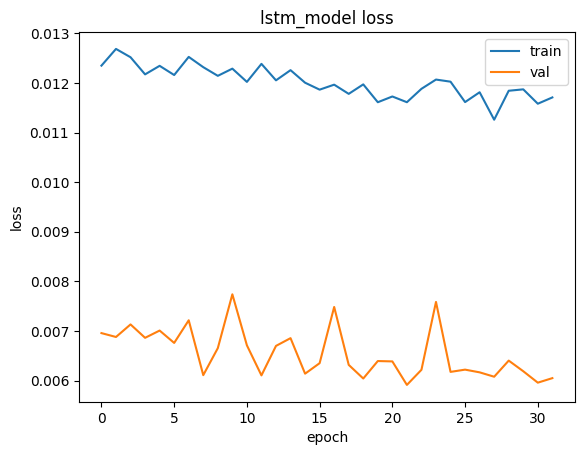

Fold 3:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

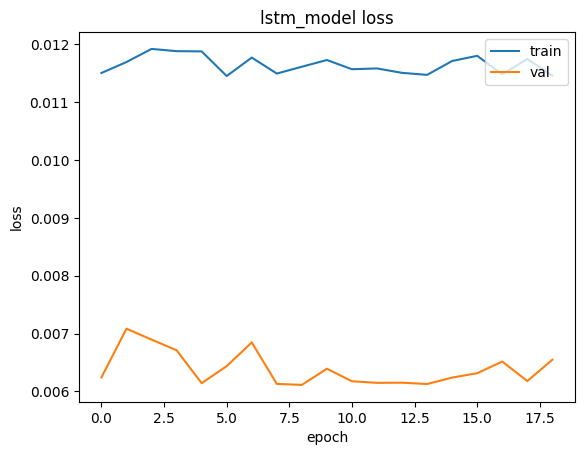

Fold 4:
  Train: index=[   0    1    2 ... 1077 1078 1079]
  Test:  index=[1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093
 1094 1095 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107
 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121
 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135
 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149
 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163
 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177
 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191
 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205
 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219
 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233
 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247
 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261
 12

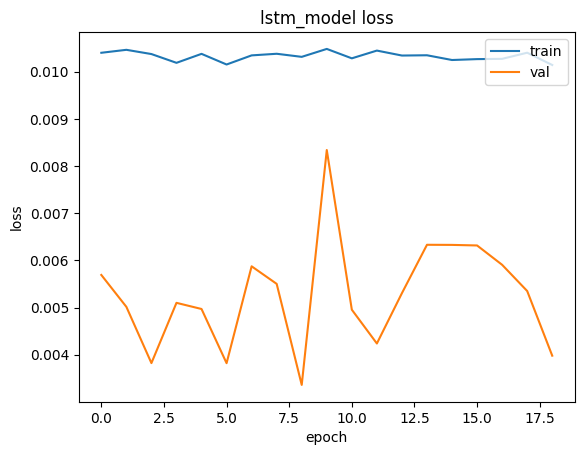

Train RMSE [0.15260644151844835, 0.11923245264890733, 0.1058511907806744, 0.10617014832641422, 0.0993147322151764]
Validation RMSE [0.10710882638403753, 0.1000707190757894, 0.07777503066436361, 0.08091343165138898, 0.06308775213345208]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = train_X.shape[1]
number_of_rows = train_X.shape[0]
number_of_columns = train_X.shape[2]

model_path = '/content/drive/MyDrive/LSTM_By_Hour/lstm_model_5_fold'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='5_fold_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse_train = []
rmse_val = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
print(tscv)
for i, (train_index, test_index) in enumerate(tscv.split(train_X)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")
  train_X = train[:train_index[-1], :-1]
  train_y = train[:train_index[-1], -1]
  train_X = train_X.reshape(train_X.shape[0], 1, 7)
  val_X = train[test_index[-1]:, :-1]
  val_y = train[test_index[-1]:, -1]
  val_X = val_X.reshape(val_X.shape[0], 1, 7)
  hist = lstm_model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), callbacks=my_callbacks, verbose=2)
  lstm_model.save(model_path)

  pred_y_train = lstm_model.predict(train_X)
  train_X = train_X.reshape((train_X.shape[0], 7))

  inv_y = calc_y_inverse(train_X, train_y)
  inv_yhat = calc_yhat_inverse(pred_y_train ,train_X)
  rmse_train.append(np.sqrt(mean_squared_error(train_y, pred_y_train)))

  pred_y_val = lstm_model.predict(val_X)
  val_X = val_X.reshape((val_X.shape[0], 7))

  inv_y = calc_y_inverse(val_X, val_y)
  inv_yhat = calc_yhat_inverse(pred_y_val, val_X)
  rmse_val.append(np.sqrt(mean_squared_error(val_y, pred_y_val)))

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('lstm_model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

print("Train RMSE", rmse_train)
print("Validation RMSE", rmse_val)

In [ ]:
print("Train RMSE", np.mean(rmse_train))
print("Validation RMSE", np.mean(rmse_val))

Train RMSE 0.11663499309792413
Validation RMSE 0.08579115198180631


### Evaluate the model


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_y_test = lstm_model.predict(test_X)
rmse_test = np.sqrt(mean_squared_error(test_y, pred_y_test))
print("Test RMSE", rmse_test)

5/5 [==============================] - 0s 3ms/step
Test RMSE 0.08048572483912259


In [ ]:
lstm_model.evaluate(test_X,test_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.0065 - root_mean_squared_error: 0.0805


[0.006477952003479004, 0.08048572391271591]

### From the above code cells,
#### Train RMSE = 0.1166
#### Validation RMSE = 0.0858
#### Test RMSE = 0.0805

### Plot the graph of learned and actual labels in testing stage

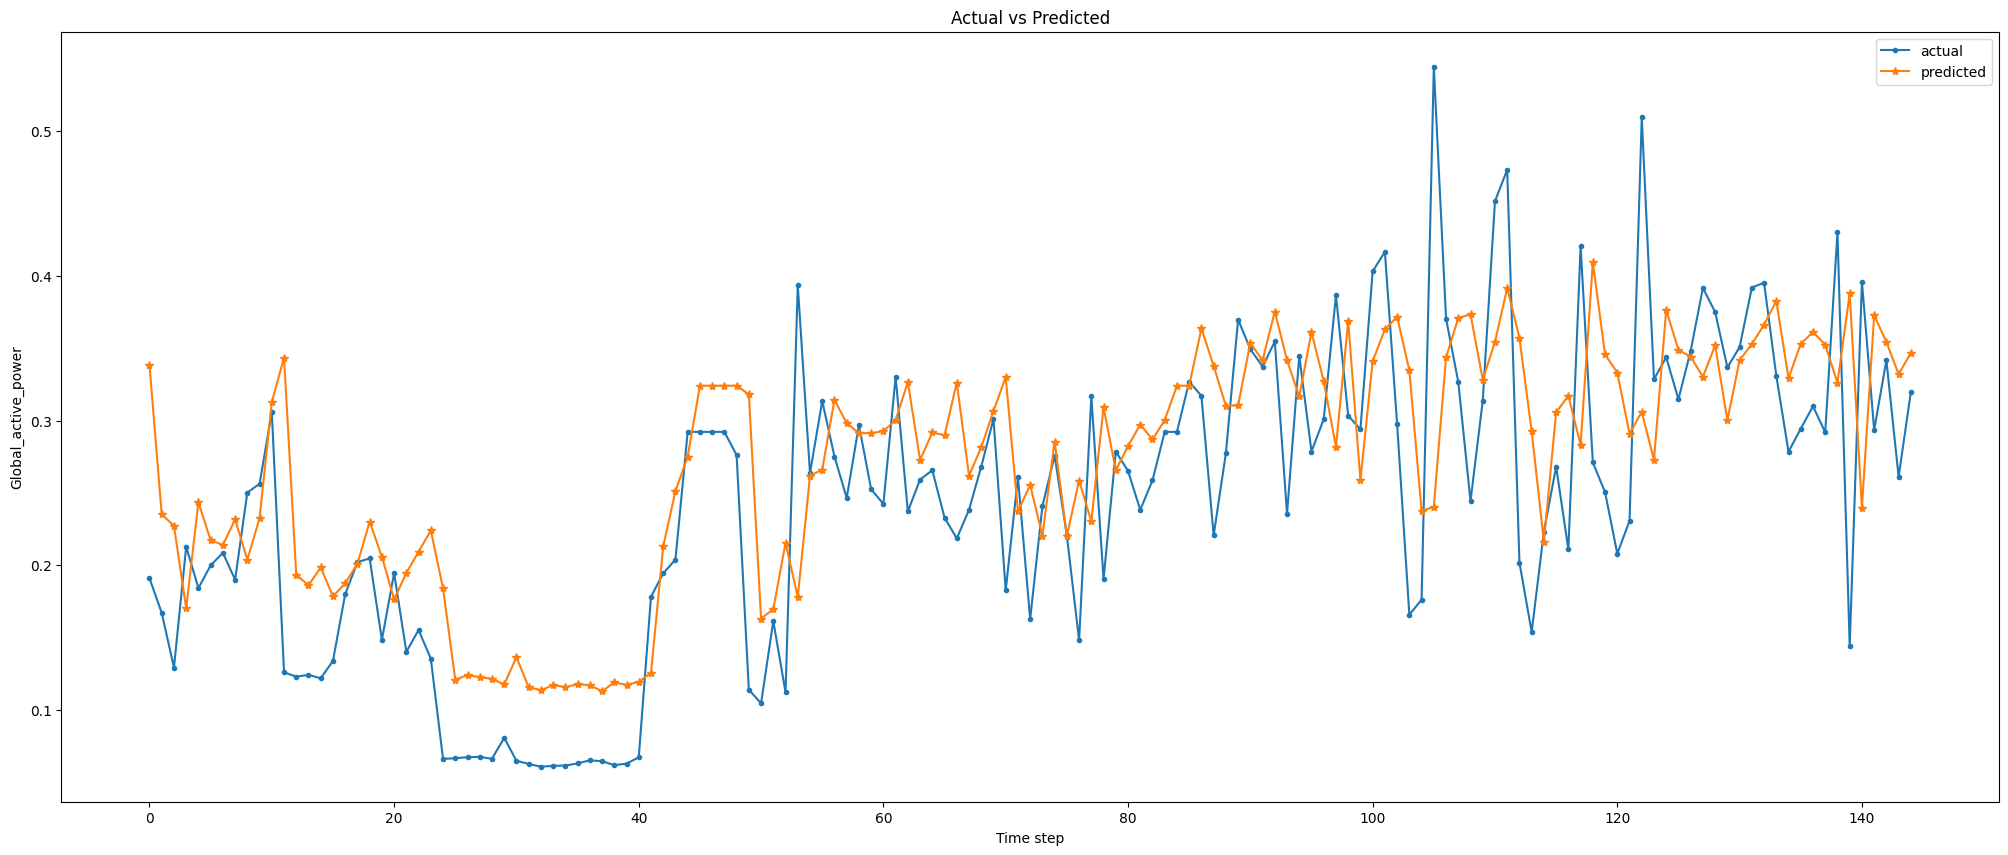

In [ ]:
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(pred_y_test)), pred_y_test[:], marker="*", label="predicted")
plt.legend()
plt.show()

In [ ]:
def calc_yhat_inverse(yhat,X):
  # invert scaling for forecast
  inv_yhat = np.concatenate((yhat, X[:, -6:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]
  return inv_yhat

def calc_y_inverse(X, y):
  # invert scaling for actual
  y = y.reshape((len(y), 1))
  inv_y = np.concatenate((y, X[:, -6:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]
  return inv_y

In [ ]:
test_X = test_X.reshape((test_X.shape[0], 7))

inv_y = calc_y_inverse(test_X,test_y)
inv_yhat = calc_yhat_inverse(pred_y_test,test_X)

In [ ]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.
def plot(inv_y, inv_yhat, size, title):
  import matplotlib.pyplot as plt
  fig_verify = plt.figure(figsize=(25,10))
  aa=[x for x in range(size)]
  plt.plot(aa, inv_y[:size], marker='.', label="actual")
  plt.plot(aa, inv_yhat[:size], 'r', marker='*', label="predicted")
  plt.ylabel('Global_active_power')
  plt.xlabel('Time step')
  plt.title(title)
  plt.legend()
  plt.show()

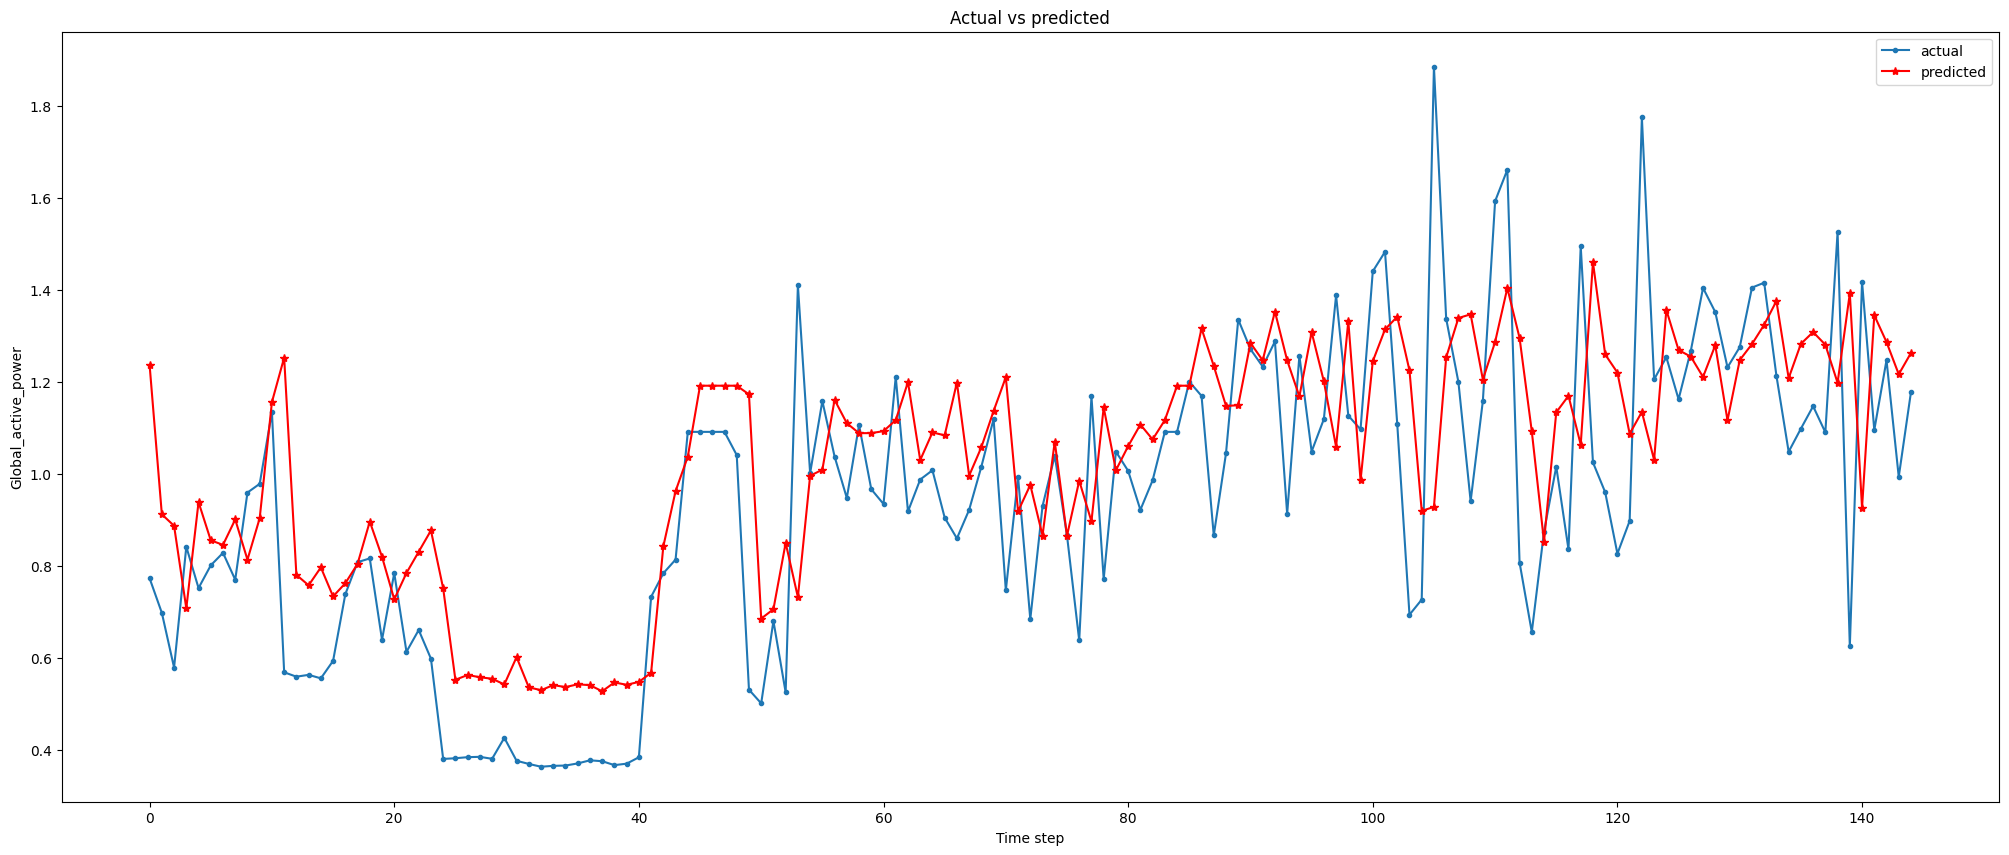

In [ ]:
plot(inv_y,inv_yhat,len(test_X),"Actual vs predicted")

#### To reproduce the graphs if needed

In [ ]:
print(test_y)

[0.19095185 0.16706197 0.12922366 0.21276482 0.18420601 0.199909
 0.20854646 0.18997552 0.25023082 0.25627934 0.30597583 0.1259666
 0.12293681 0.12419391 0.12178848 0.13387447 0.17993636 0.20210706
 0.20469644 0.14843178 0.19458211 0.140137   0.15521741 0.1353845
 0.06606239 0.06653905 0.06728103 0.06751273 0.06614596 0.08067807
 0.06479158 0.06260723 0.06067713 0.0612807  0.06149825 0.06295832
 0.06510154 0.06449222 0.06177196 0.06278808 0.06720453 0.17812786
 0.19443177 0.20388979 0.29219587 0.29219587 0.29219587 0.29219587
 0.27614766 0.11393986 0.10449719 0.16141848 0.11208139 0.39361427
 0.26366014 0.31354287 0.27514477 0.24647055 0.29692546 0.25252527
 0.24233798 0.33020406 0.23716541 0.2592428  0.26564949 0.23291919
 0.21852681 0.23829074 0.26818227 0.30107617 0.18262346 0.26096773
 0.16267559 0.240862   0.27576514 0.2205679  0.14797457 0.31671593
 0.19037392 0.27859197 0.26520908 0.2382651  0.2586756  0.29219587
 0.29219587 0.32693596 0.31706834 0.2206413  0.27735963 0.36987032

In [ ]:
print(pred_y_test)

[[0.33833283]
 [0.23518172]
 [0.22724947]
 [0.17017597]
 [0.24362975]
 [0.21719632]
 [0.21407503]
 [0.23161519]
 [0.20382169]
 [0.23252687]
 [0.31280726]
 [0.34352332]
 [0.1933181 ]
 [0.18611193]
 [0.19847423]
 [0.17842507]
 [0.18754134]
 [0.2009193 ]
 [0.23018786]
 [0.20580953]
 [0.17639168]
 [0.19463438]
 [0.20936155]
 [0.2240181 ]
 [0.18398377]
 [0.12078951]
 [0.1241077 ]
 [0.12254564]
 [0.1215103 ]
 [0.1175837 ]
 [0.13644475]
 [0.11559348]
 [0.11358202]
 [0.11711475]
 [0.11574059]
 [0.11767209]
 [0.11705394]
 [0.11284891]
 [0.11896383]
 [0.11732738]
 [0.11931865]
 [0.12562811]
 [0.21306601]
 [0.25120956]
 [0.2750778 ]
 [0.3241175 ]
 [0.3241175 ]
 [0.3241175 ]
 [0.3241175 ]
 [0.3181354 ]
 [0.16308063]
 [0.16958794]
 [0.21541989]
 [0.17792019]
 [0.26183048]
 [0.26607162]
 [0.31434524]
 [0.298209  ]
 [0.29129153]
 [0.29134178]
 [0.29270503]
 [0.30034578]
 [0.3266523 ]
 [0.2726842 ]
 [0.2918045 ]
 [0.28981602]
 [0.326321  ]
 [0.26190713]
 [0.28158283]
 [0.30663493]
 [0.3300035 ]
 [0.23

# LSTM model trained on Household Power Consumption Dataset with 10-fold cross validation

In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
values = values.astype('float64')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.740357  0.694252  0.426671  0.550494  0.695226  0.181857  0.345776   
2   0.536762  0.431901  0.234750  0.620518  0.424618  0.095088  0.216451   
3   0.566912  0.313037  0.202322  0.667476  0.311508  0.075051  0.627798   
4   0.218615  0.436748  0.232377  0.686364  0.428075  0.000000  0.218680   
5   0.568916  0.324670  0.182809  0.608808  0.319591  0.158084  0.216830   

    var7(t)  
1  0.536762  
2  0.566912  
3  0.218615  
4  0.568916  
5  0.407300  


In [ ]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181857   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095088   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075051   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)  
1   0.740357  0.694252  
2   0.536762  0.431901  
3   0.566912  0.313037  
4   0.218615  0.436748  
5   0.568916  0.324670  


In [ ]:
values = reframed.values
print(values)

[[0.91678642 0.13073198 0.3153853  ... 0.16396519 0.74035748 0.6942518 ]
 [0.6942518  0.42667057 0.55049373 ... 0.34577587 0.53676241 0.43190139]
 [0.43190139 0.23474981 0.62051772 ... 0.21645057 0.5669116  0.31303746]
 ...
 [0.29343625 0.16199721 0.58037729 ... 0.03782311 0.28158539 0.34179083]
 [0.34179083 0.14708326 0.54706415 ... 0.23519696 0.48701848 0.26107518]
 [0.26107518 0.0982707  0.63914907 ... 0.03518044 0.16851481 0.31977106]]


In [ ]:
len(values)

1441

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 50
# Splitting the data by a percentage
train, test = train_test_split(values, train_size=0.9, test_size=0.1, random_state=SEED, shuffle=False)
# val, test = train_test_split(test, train_size=0.5, test_size=0.5, random_state=SEED, shuffle=False)

In [ ]:
# train = values[:27670, :]  # 80 percent
# test = values[27670:31129, :] # 10 percent
# val = values[31129:,:] # 10 percent

In [ ]:
print(train.shape)
print(test.shape)


(1296, 8)
(145, 8)


###Split into training and test sets

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1296, 1, 7) (1296,) (145, 1, 7) (145,)


### Define the LSTM model architecture

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(Dropout(0.10))
    m1.add(Dense(1))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

### Train the model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               43200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________
None
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None)
Fold 0:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  5

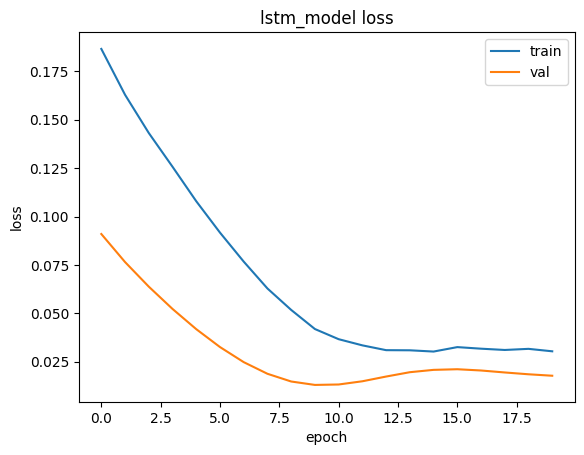

Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

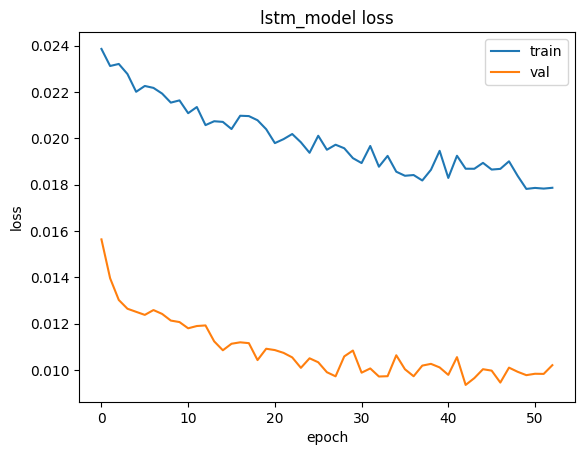

Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

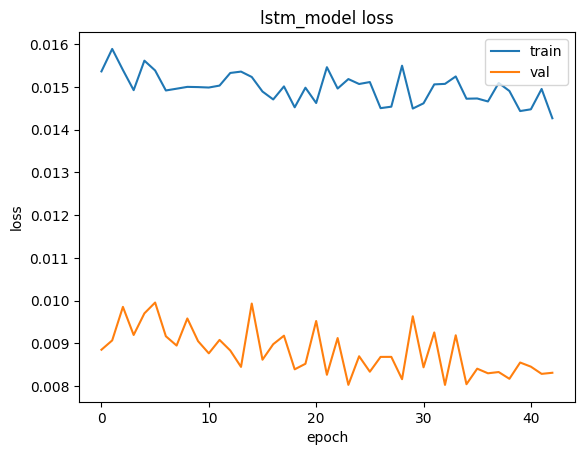

Fold 3:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

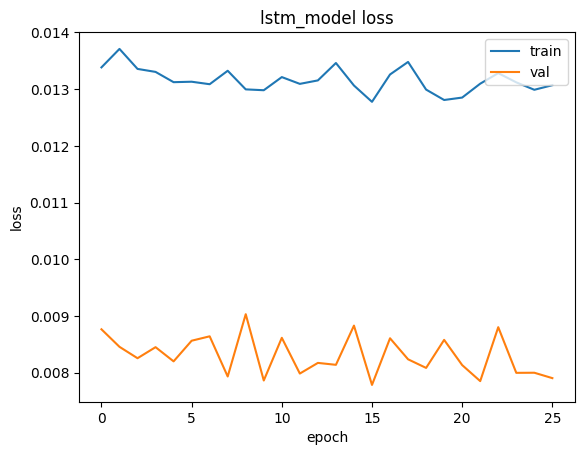

Fold 4:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

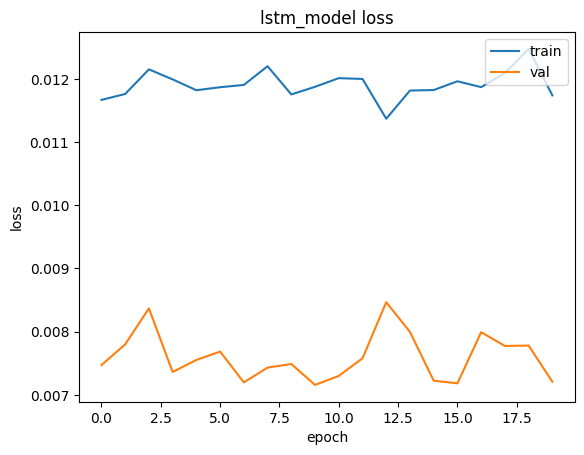

Fold 5:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

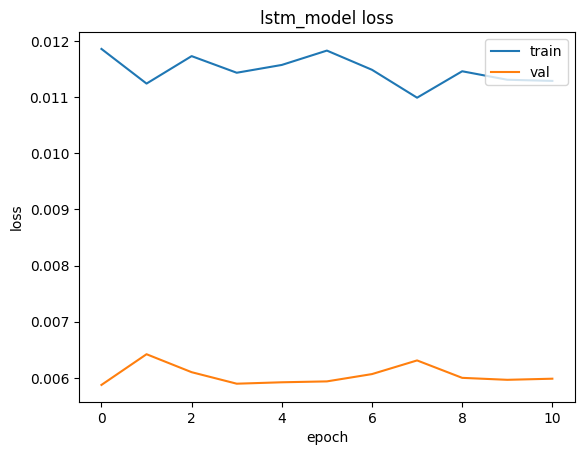

Fold 6:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

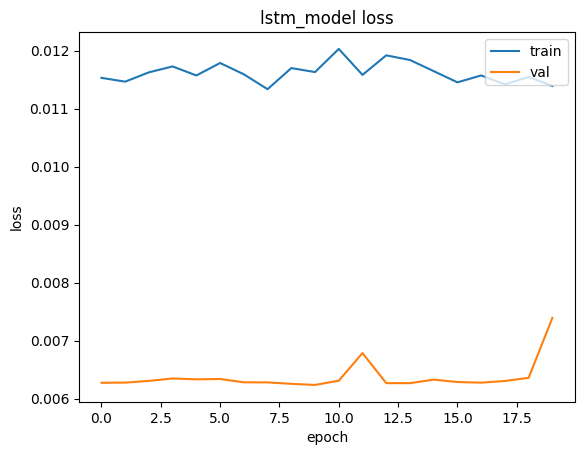

Fold 7:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

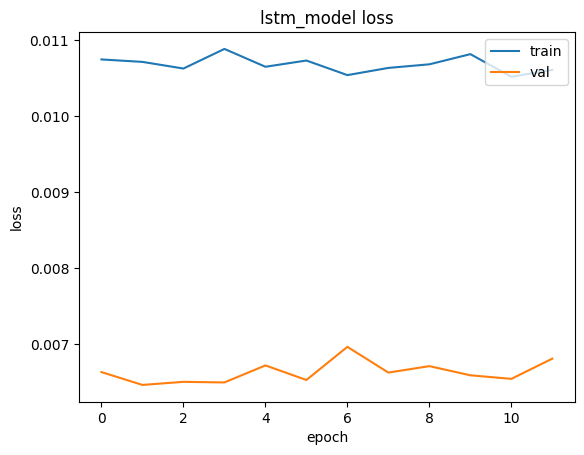

Fold 8:
  Train: index=[   0    1    2 ... 1059 1060 1061]
  Test:  index=[1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075
 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089
 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1102 1103
 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117
 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131
 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145
 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159
 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173
 1174 1175 1176 1177 1178]
Epoch 1/100
34/34 - 0s - loss: 0.0101 - root_mean_squared_error: 0.1005 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0639 - 280ms/epoch - 8ms/step
Epoch 2/100
34/34 - 0s - loss: 0.0101 - root_mean_squared_error: 0.1003 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0630 - 215ms/epoch - 6ms/step
Epoch 3/100
34/34 - 0s 

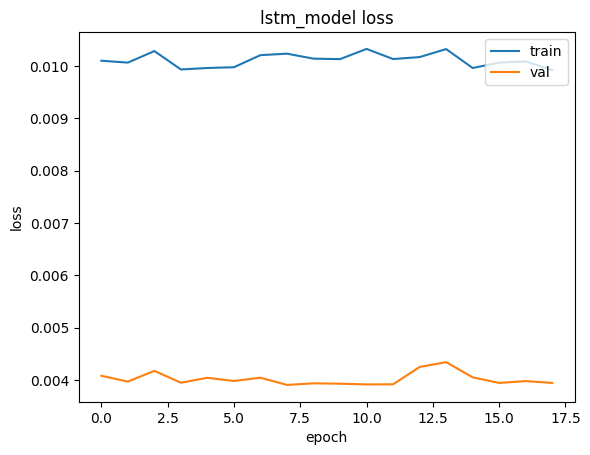

Fold 9:
  Train: index=[   0    1    2 ... 1176 1177 1178]
  Test:  index=[1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192
 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205 1206
 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220
 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234
 1235 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248
 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262
 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276
 1277 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290
 1291 1292 1293 1294 1295]
Epoch 1/100
37/37 - 0s - loss: 0.0101 - root_mean_squared_error: 0.1003 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0814 - 261ms/epoch - 7ms/step
Epoch 2/100
37/37 - 0s - loss: 0.0099 - root_mean_squared_error: 0.0997 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0542 - 220ms/epoch - 6ms/step
Epoch 3/100
37/37 - 0s 

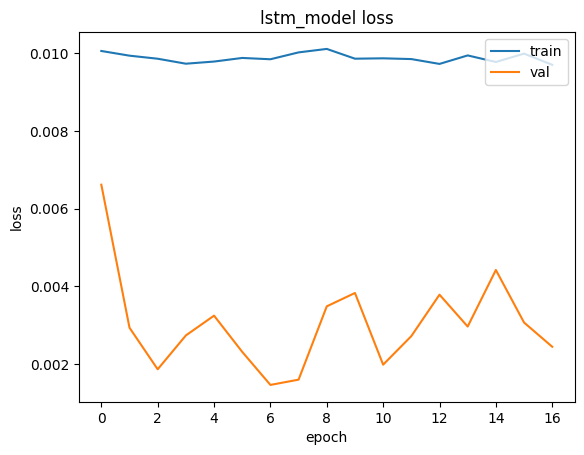

Train RMSE [0.1740504216939281, 0.13327413587607181, 0.11871222682704326, 0.11170322019185497, 0.10714271495120951, 0.10413791851669857, 0.1083952701267843, 0.10222755747320719, 0.09857639145022594, 0.09738930740846627]
Validation RMSE [0.1330466608083475, 0.10103785186110917, 0.09118406744441902, 0.088899477382615, 0.08489625189078477, 0.07736619904572026, 0.08597200797969648, 0.08252942113795299, 0.06279460917866472, 0.049456721216284416]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = train_X.shape[1]
number_of_rows = train_X.shape[0]
number_of_columns = train_X.shape[2]

model_path = '/content/drive/MyDrive/LSTM_By_Hour/lstm_model_10_fold'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='10_fold_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse_train = []
rmse_val = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None)
print(tscv)
for i, (train_index, test_index) in enumerate(tscv.split(train_X)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")
  train_X = train[:train_index[-1], :-1]
  train_y = train[:train_index[-1], -1]
  train_X = train_X.reshape(train_X.shape[0], 1, 7)
  val_X = train[test_index[-1]:, :-1]
  val_y = train[test_index[-1]:, -1]
  val_X = val_X.reshape(val_X.shape[0], 1, 7)
  hist = lstm_model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), callbacks=my_callbacks, verbose=2)
  lstm_model.save(model_path)

  pred_y_train = lstm_model.predict(train_X)
  train_X = train_X.reshape((train_X.shape[0], 7))

  inv_y = calc_y_inverse(train_X, train_y)
  inv_yhat = calc_yhat_inverse(pred_y_train ,train_X)
  rmse_train.append(np.sqrt(mean_squared_error(train_y, pred_y_train)))

  pred_y_val = lstm_model.predict(val_X)
  val_X = val_X.reshape((val_X.shape[0], 7))

  inv_y = calc_y_inverse(val_X, val_y)
  inv_yhat = calc_yhat_inverse(pred_y_val, val_X)
  rmse_val.append(np.sqrt(mean_squared_error(val_y, pred_y_val)))

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('lstm_model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

print("Train RMSE", rmse_train)
print("Validation RMSE", rmse_val)

In [ ]:
print("Train RMSE", np.mean(rmse_train))
print("Validation RMSE", np.mean(rmse_val))

Train RMSE 0.11556091645154898
Validation RMSE 0.08571832679455944


### Evaluate the model


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_y_test = lstm_model.predict(test_X)
rmse_test = np.sqrt(mean_squared_error(test_y, pred_y_test))
print("Test RMSE", rmse_test)

5/5 [==============================] - 0s 3ms/step
Test RMSE 0.08048514238098431


In [ ]:
lstm_model.evaluate(test_X,test_y)

5/5 [==============================] - 0s 4ms/step - loss: 0.0065 - root_mean_squared_error: 0.0805


[0.006477858405560255, 0.08048514276742935]

### From the above code cells,
#### Train RMSE = 0.1156
#### Validation RMSE = 0.0857
#### Test RMSE = 0.0805

### Plot the graph of learned and actual labels in testing stage

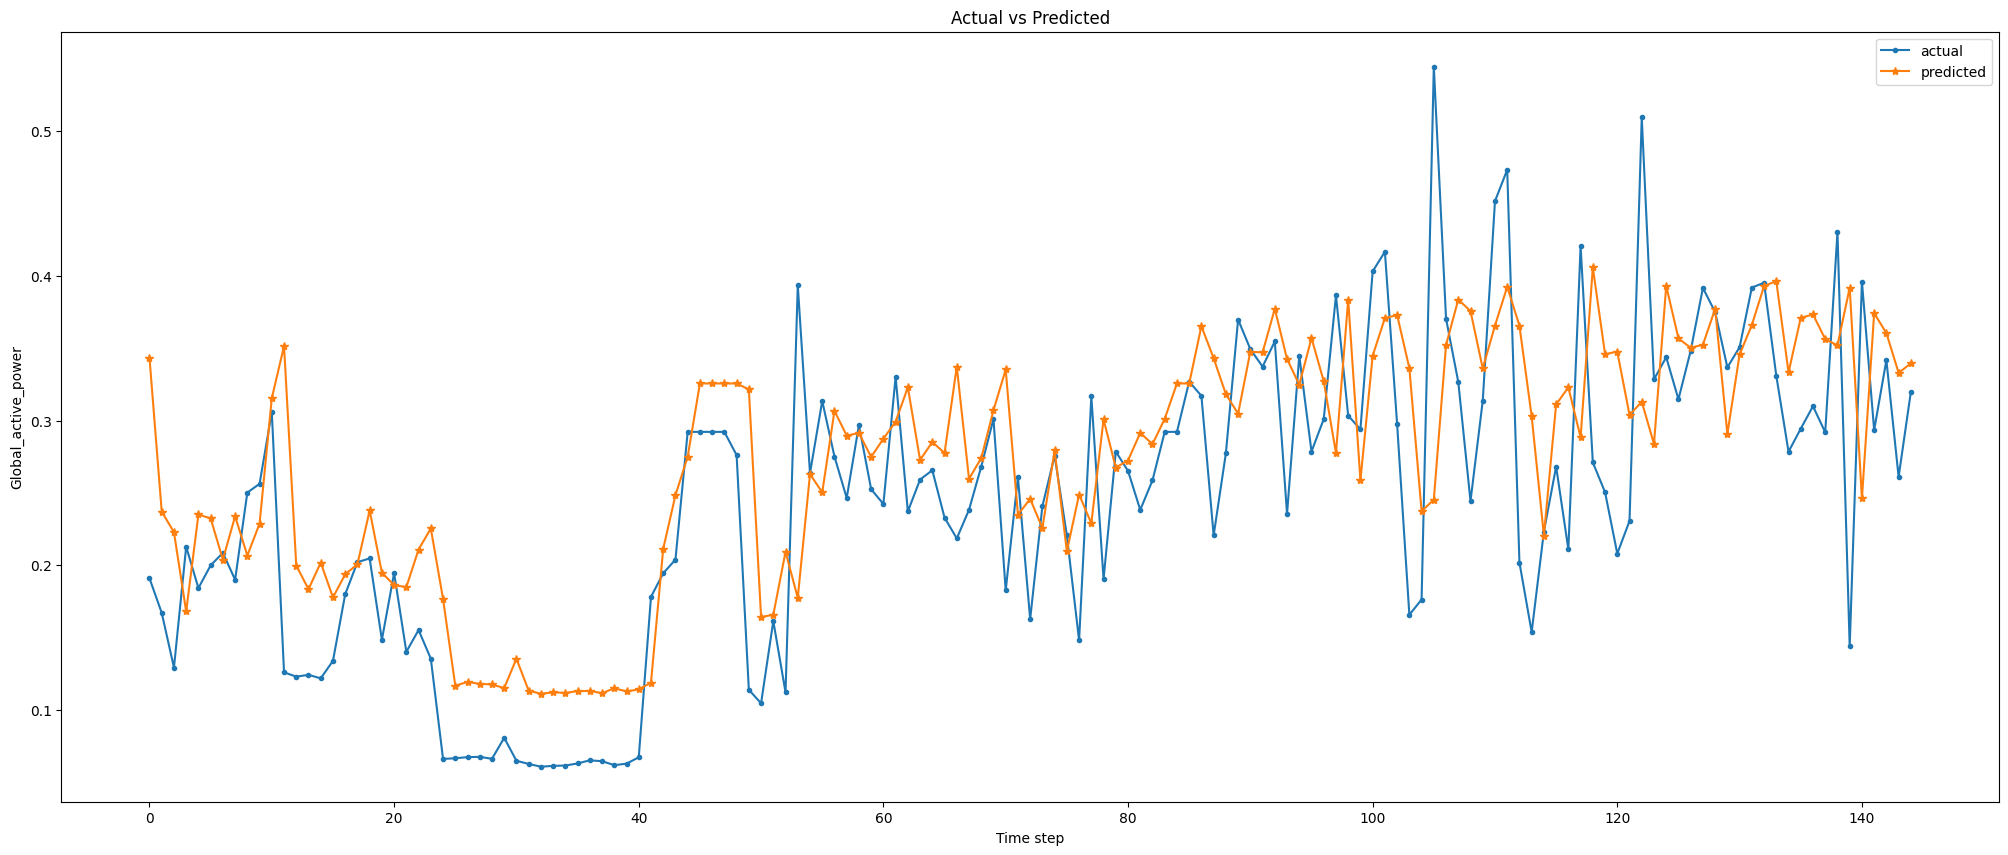

In [ ]:
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(test_y)), test_y[:], marker=".", label="actual")
plt.plot(range(len(pred_y_test)), pred_y_test[:], marker="*", label="predicted")
plt.legend()
plt.show()

In [ ]:
def calc_yhat_inverse(yhat,X):
  # invert scaling for forecast
  inv_yhat = np.concatenate((yhat, X[:, -6:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]
  return inv_yhat

def calc_y_inverse(X, y):
  # invert scaling for actual
  y = y.reshape((len(y), 1))
  inv_y = np.concatenate((y, X[:, -6:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]
  return inv_y

In [ ]:
test_X = test_X.reshape((test_X.shape[0], 7))

inv_y = calc_y_inverse(test_X,test_y)
inv_yhat = calc_yhat_inverse(pred_y_test,test_X)

In [ ]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.
def plot(inv_y, inv_yhat, size, title):
  import matplotlib.pyplot as plt
  fig_verify = plt.figure(figsize=(25,10))
  aa=[x for x in range(size)]
  plt.plot(aa, inv_y[:size], marker='.', label="actual")
  plt.plot(aa, inv_yhat[:size], 'r', marker='*', label="predicted")
  plt.ylabel('Global_active_power')
  plt.xlabel('Time step')
  plt.title(title)
  plt.legend()
  plt.show()

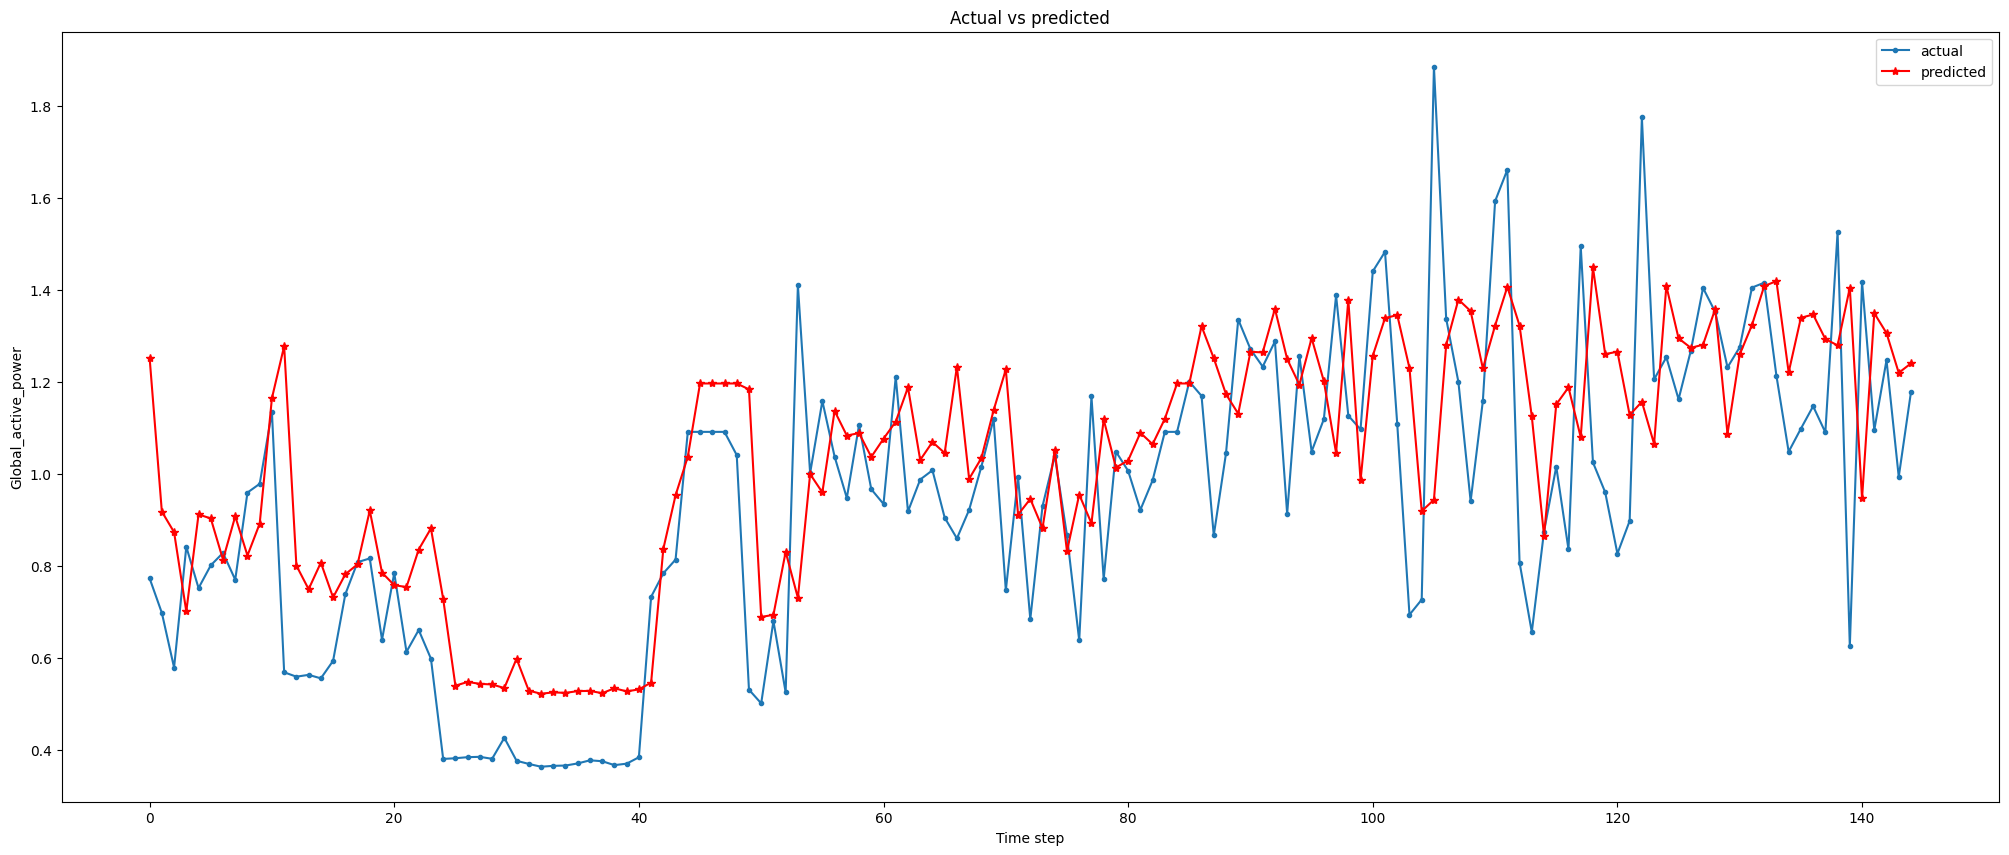

In [ ]:
plot(inv_y,inv_yhat,len(test_X),"Actual vs predicted")

#### To reproduce the graphs if needed

In [ ]:
print(test_y)

[0.19095185 0.16706197 0.12922366 0.21276482 0.18420601 0.199909
 0.20854646 0.18997552 0.25023082 0.25627934 0.30597583 0.1259666
 0.12293681 0.12419391 0.12178848 0.13387447 0.17993636 0.20210706
 0.20469644 0.14843178 0.19458211 0.140137   0.15521741 0.1353845
 0.06606239 0.06653905 0.06728103 0.06751273 0.06614596 0.08067807
 0.06479158 0.06260723 0.06067713 0.0612807  0.06149825 0.06295832
 0.06510154 0.06449222 0.06177196 0.06278808 0.06720453 0.17812786
 0.19443177 0.20388979 0.29219587 0.29219587 0.29219587 0.29219587
 0.27614766 0.11393986 0.10449719 0.16141848 0.11208139 0.39361427
 0.26366014 0.31354287 0.27514477 0.24647055 0.29692546 0.25252527
 0.24233798 0.33020406 0.23716541 0.2592428  0.26564949 0.23291919
 0.21852681 0.23829074 0.26818227 0.30107617 0.18262346 0.26096773
 0.16267559 0.240862   0.27576514 0.2205679  0.14797457 0.31671593
 0.19037392 0.27859197 0.26520908 0.2382651  0.2586756  0.29219587
 0.29219587 0.32693596 0.31706834 0.2206413  0.27735963 0.36987032

In [ ]:
print(pred_y_test)

[[0.34341937]
 [0.23708755]
 [0.22284316]
 [0.16802928]
 [0.23509574]
 [0.23236105]
 [0.2038771 ]
 [0.23382768]
 [0.20668596]
 [0.22876298]
 [0.31550303]
 [0.35148418]
 [0.1997712 ]
 [0.18340707]
 [0.20177525]
 [0.17771778]
 [0.19373505]
 [0.20064452]
 [0.23783894]
 [0.1948668 ]
 [0.18620564]
 [0.18490243]
 [0.21086127]
 [0.22541921]
 [0.17669958]
 [0.11672527]
 [0.11929199]
 [0.11797823]
 [0.11754718]
 [0.115077  ]
 [0.13535269]
 [0.11325537]
 [0.11113802]
 [0.11208066]
 [0.11173268]
 [0.11295658]
 [0.11310284]
 [0.11151063]
 [0.11492766]
 [0.11277391]
 [0.11413933]
 [0.11883846]
 [0.21136755]
 [0.24839006]
 [0.2750189 ]
 [0.32566524]
 [0.32566524]
 [0.32566524]
 [0.32566524]
 [0.32159257]
 [0.16421676]
 [0.16569588]
 [0.20923346]
 [0.17743495]
 [0.26300538]
 [0.2503376 ]
 [0.3066916 ]
 [0.2896587 ]
 [0.29135606]
 [0.27488214]
 [0.28745937]
 [0.29926035]
 [0.32296395]
 [0.2727756 ]
 [0.28518167]
 [0.27757645]
 [0.3373124 ]
 [0.25972557]
 [0.27404147]
 [0.30710316]
 [0.33532852]
 [0.23

# LSTM model trained on Household Power Consumption Dataset with 3 day lookback

In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
print(df_resample.shape)
print(df_resample.head())

(1442, 7)
            Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467

In [ ]:
electricityDf.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [ ]:
df_resample.head()

Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361        0.000000        1.838889        9.765972

In [ ]:
def lookback(data, lookback_days=3, verbose= False):
  from datetime import datetime, timedelta
  X = []
  Y = []
  lookback_str = None

  # for index, row in data.iterrows():
  for i in range(0, len(data), lookback_days):
    slicer = data.iloc[i:i+lookback_days+1]
    date = slicer.index[0]
    print(date)
    lookback = [date + timedelta(days=day_ago) for day_ago in range(0, lookback_days+1)]
    lookback_str = [i.strftime('%Y-%m-%d %H:%M:%S') for i in lookback]
    try:
      slice_x = data.loc[lookback_str[0]: lookback_str[-2]]
      slice_x_cols = slice_x.columns
      if len(slice_x) == lookback_days:
        X.append(slice_x[slice_x_cols[1:]].to_numpy())
        Y.append(data.loc[lookback_str[-1]][slice_x_cols[0]])
      print(len(slice_x))
    except:
      pass

  return X, Y

In [ ]:
X, Y = lookback(df_resample)

2006-12-16 00:00:00
3
2006-12-19 00:00:00
3
2006-12-22 00:00:00
3
2006-12-25 00:00:00
3
2006-12-28 00:00:00
3
2006-12-31 00:00:00
3
2007-01-03 00:00:00
3
2007-01-06 00:00:00
3
2007-01-09 00:00:00
3
2007-01-12 00:00:00
3
2007-01-15 00:00:00
3
2007-01-18 00:00:00
3
2007-01-21 00:00:00
3
2007-01-24 00:00:00
3
2007-01-27 00:00:00
3
2007-01-30 00:00:00
3
2007-02-02 00:00:00
3
2007-02-05 00:00:00
3
2007-02-08 00:00:00
3
2007-02-11 00:00:00
3
2007-02-14 00:00:00
3
2007-02-17 00:00:00
3
2007-02-20 00:00:00
3
2007-02-23 00:00:00
3
2007-02-26 00:00:00
3
2007-03-01 00:00:00
3
2007-03-04 00:00:00
3
2007-03-07 00:00:00
3
2007-03-10 00:00:00
3
2007-03-13 00:00:00
3
2007-03-16 00:00:00
3
2007-03-19 00:00:00
3
2007-03-22 00:00:00
3
2007-03-25 00:00:00
3
2007-03-28 00:00:00
3
2007-03-31 00:00:00
3
2007-04-03 00:00:00
3
2007-04-06 00:00:00
3
2007-04-09 00:00:00
3
2007-04-12 00:00:00
3
2007-04-15 00:00:00
3
2007-04-18 00:00:00
3
2007-04-21 00:00:00
3
2007-04-24 00:00:00
3
2007-04-27 00:00:00
3
2007-04-30

In [ ]:
from copy import deepcopy
X_raw = deepcopy(X)
Y_raw = deepcopy(Y)

In [ ]:
import numpy as np
X = np.array(X_raw)
Y = np.array(Y_raw)

###Split into training and test sets

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

time_steps = X.shape[1]
number_of_rows = X.shape[0]
number_of_columns = X.shape[2]

scaler = MinMaxScaler((0, 1))

X_flatten = X.reshape(number_of_rows*time_steps, number_of_columns)

X = scaler.fit_transform(X_flatten)
X = X.reshape(number_of_rows, time_steps, number_of_columns)
SEED = 50
# Splitting the data by a percentage
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.2)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape)

(384, 3, 6) (384,) (48, 3, 6) (48,) (48, 3, 6) (48,)


### Define the LSTM model architecture

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(Dropout(0.10))
    m1.add(Dense(1))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

### Train the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_By_Hour/lstm_model_3_day_lookback'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='3_day_lookback_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val,Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               42800     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
12/12 - 2s - loss: 1.0657 - root_mean_squared_error: 1.0323 - val_loss: 0.8236 - val_root_mean_squared_error: 0.9075 - 2s/epoch - 147ms/step
Epoch 2/100
12/12 - 0s - loss: 0.6438 - root_mean_squared_error: 0.8024 - val_loss: 0.3615 - val_root_mean_squared_error: 0.6013 - 90ms/epoch - 8ms/step
Epo

In [ ]:
rmse_train = np.sqrt(mean_squared_error(Y_train, lstm_model.predict(X_train)))
print(rmse_train)

12/12 [==============================] - 0s 2ms/step
0.3201036735394285


In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test, lstm_model.predict(X_test)))
print(rmse)

2/2 [==============================] - 0s 6ms/step
0.3180864303014828


In [ ]:
lstm_model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.1012 - root_mean_squared_error: 0.3181


[0.10117897391319275, 0.3180864155292511]

### From the above code cells,
#### Train RMSE = 0.3241
#### Validation RMSE = 0.3073
#### Test RMSE = 0.3181

In [ ]:
lookback_train_rmse = []
lookback_test_rmse = []

In [ ]:
lookback_train_rmse.append(rmse_train)
lookback_test_rmse.append(rmse)

### Plot the graph of learned and actual labels in testing stage

2/2 [==============================] - 0s 5ms/step


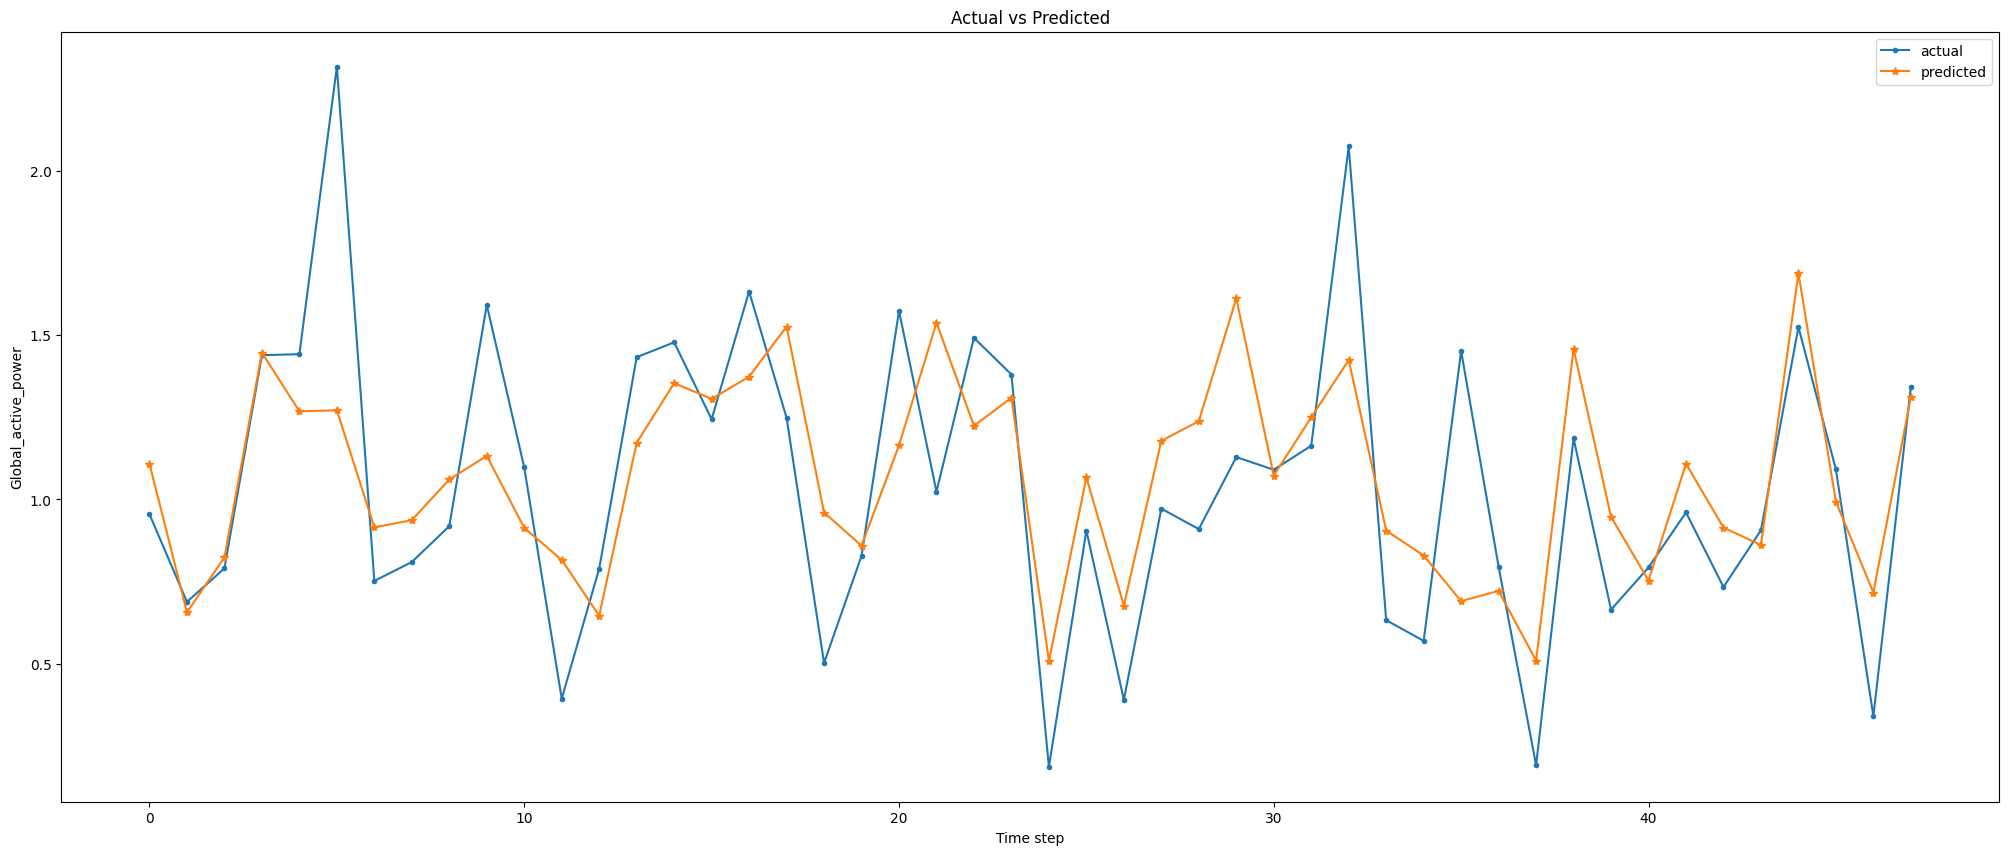

In [ ]:
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(Y_test)), Y_test[:], marker=".", label="actual")
plt.plot(range(len(Y_test)), lstm_model.predict(X_test[:]), marker="*", label="predicted")
plt.legend()
plt.show()

# LSTM model trained on Household Power Consumption Dataset with 6 day lookback

In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
print(df_resample.shape)
print(df_resample.head())

(1442, 7)
            Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467

In [ ]:
electricityDf.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [ ]:
df_resample.head()

Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361        0.000000        1.838889        9.765972

In [ ]:
def lookback(data, lookback_days=6, verbose= False):
  from datetime import datetime, timedelta
  X = []
  Y = []
  lookback_str = None

  # for index, row in data.iterrows():
  for i in range(0, len(data), lookback_days):
    slicer = data.iloc[i:i+lookback_days+1]
    date = slicer.index[0]
    print(date)
    lookback = [date + timedelta(days=day_ago) for day_ago in range(0, lookback_days+1)]
    lookback_str = [i.strftime('%Y-%m-%d %H:%M:%S') for i in lookback]
    try:
      slice_x = data.loc[lookback_str[0]: lookback_str[-2]]
      slice_x_cols = slice_x.columns
      if len(slice_x) == lookback_days:
        X.append(slice_x[slice_x_cols[1:]].to_numpy())
        Y.append(data.loc[lookback_str[-1]][slice_x_cols[0]])
      print(len(slice_x))
    except:
      pass

  return X, Y

In [ ]:
X, Y = lookback(df_resample)

2006-12-16 00:00:00
6
2006-12-22 00:00:00
6
2006-12-28 00:00:00
6
2007-01-03 00:00:00
6
2007-01-09 00:00:00
6
2007-01-15 00:00:00
6
2007-01-21 00:00:00
6
2007-01-27 00:00:00
6
2007-02-02 00:00:00
6
2007-02-08 00:00:00
6
2007-02-14 00:00:00
6
2007-02-20 00:00:00
6
2007-02-26 00:00:00
6
2007-03-04 00:00:00
6
2007-03-10 00:00:00
6
2007-03-16 00:00:00
6
2007-03-22 00:00:00
6
2007-03-28 00:00:00
6
2007-04-03 00:00:00
6
2007-04-09 00:00:00
6
2007-04-15 00:00:00
6
2007-04-21 00:00:00
6
2007-04-27 00:00:00
6
2007-05-03 00:00:00
6
2007-05-09 00:00:00
6
2007-05-15 00:00:00
6
2007-05-21 00:00:00
6
2007-05-27 00:00:00
6
2007-06-02 00:00:00
6
2007-06-08 00:00:00
6
2007-06-14 00:00:00
6
2007-06-20 00:00:00
6
2007-06-26 00:00:00
6
2007-07-02 00:00:00
6
2007-07-08 00:00:00
6
2007-07-14 00:00:00
6
2007-07-20 00:00:00
6
2007-07-26 00:00:00
6
2007-08-01 00:00:00
6
2007-08-07 00:00:00
6
2007-08-13 00:00:00
6
2007-08-19 00:00:00
6
2007-08-25 00:00:00
6
2007-08-31 00:00:00
6
2007-09-06 00:00:00
6
2007-09-12

In [ ]:
from copy import deepcopy
X_raw = deepcopy(X)
Y_raw = deepcopy(Y)

In [ ]:
import numpy as np
X = np.array(X_raw)
Y = np.array(Y_raw)

###Split into training and test sets

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

time_steps = X.shape[1]
number_of_rows = X.shape[0]
number_of_columns = X.shape[2]

scaler = MinMaxScaler((0, 1))

X_flatten = X.reshape(number_of_rows*time_steps, number_of_columns)

X = scaler.fit_transform(X_flatten)
X = X.reshape(number_of_rows, time_steps, number_of_columns)
SEED = 50
# Splitting the data by a percentage
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.2)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape)

(192, 6, 6) (192,) (24, 6, 6) (24,) (24, 6, 6) (24,)


### Define the LSTM model architecture

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(Dropout(0.10))
    m1.add(Dense(1))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

### Train the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_By_Hour/lstm_model_6_day_lookback'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='6_day_lookback_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val,Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               42800     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 - 2s - loss: 1.2507 - root_mean_squared_error: 1.1183 - val_loss: 1.0836 - val_root_mean_squared_error: 1.0410 - 2s/epoch - 285ms/step
Epoch 2/100
6/6 - 0s - loss: 0.9745 - root_mean_squared_error: 0.9872 - val_loss: 0.8126 - val_root_mean_squared_error: 0.9014 - 88ms/epoch - 15ms/step
Epoch 

In [ ]:
rmse_train = np.sqrt(mean_squared_error(Y_train, lstm_model.predict(X_train)))
print(rmse_train)

6/6 [==============================] - 0s 8ms/step
0.31015509925657103


In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test, lstm_model.predict(X_test)))
print(rmse)

1/1 [==============================] - 0s 141ms/step
0.35116509741805046


In [ ]:
lstm_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 26ms/step - loss: 0.1233 - root_mean_squared_error: 0.3512


[0.1233169212937355, 0.3511650860309601]

### From the above code cells,
#### Train RMSE = 0.3102
#### Validation RMSE = 0.2758
#### Test RMSE = 0.3512

In [ ]:
lookback_train_rmse.append(rmse_train)
lookback_test_rmse.append(rmse)

### Plot the graph of learned and actual labels in testing stage

1/1 [==============================] - 0s 18ms/step


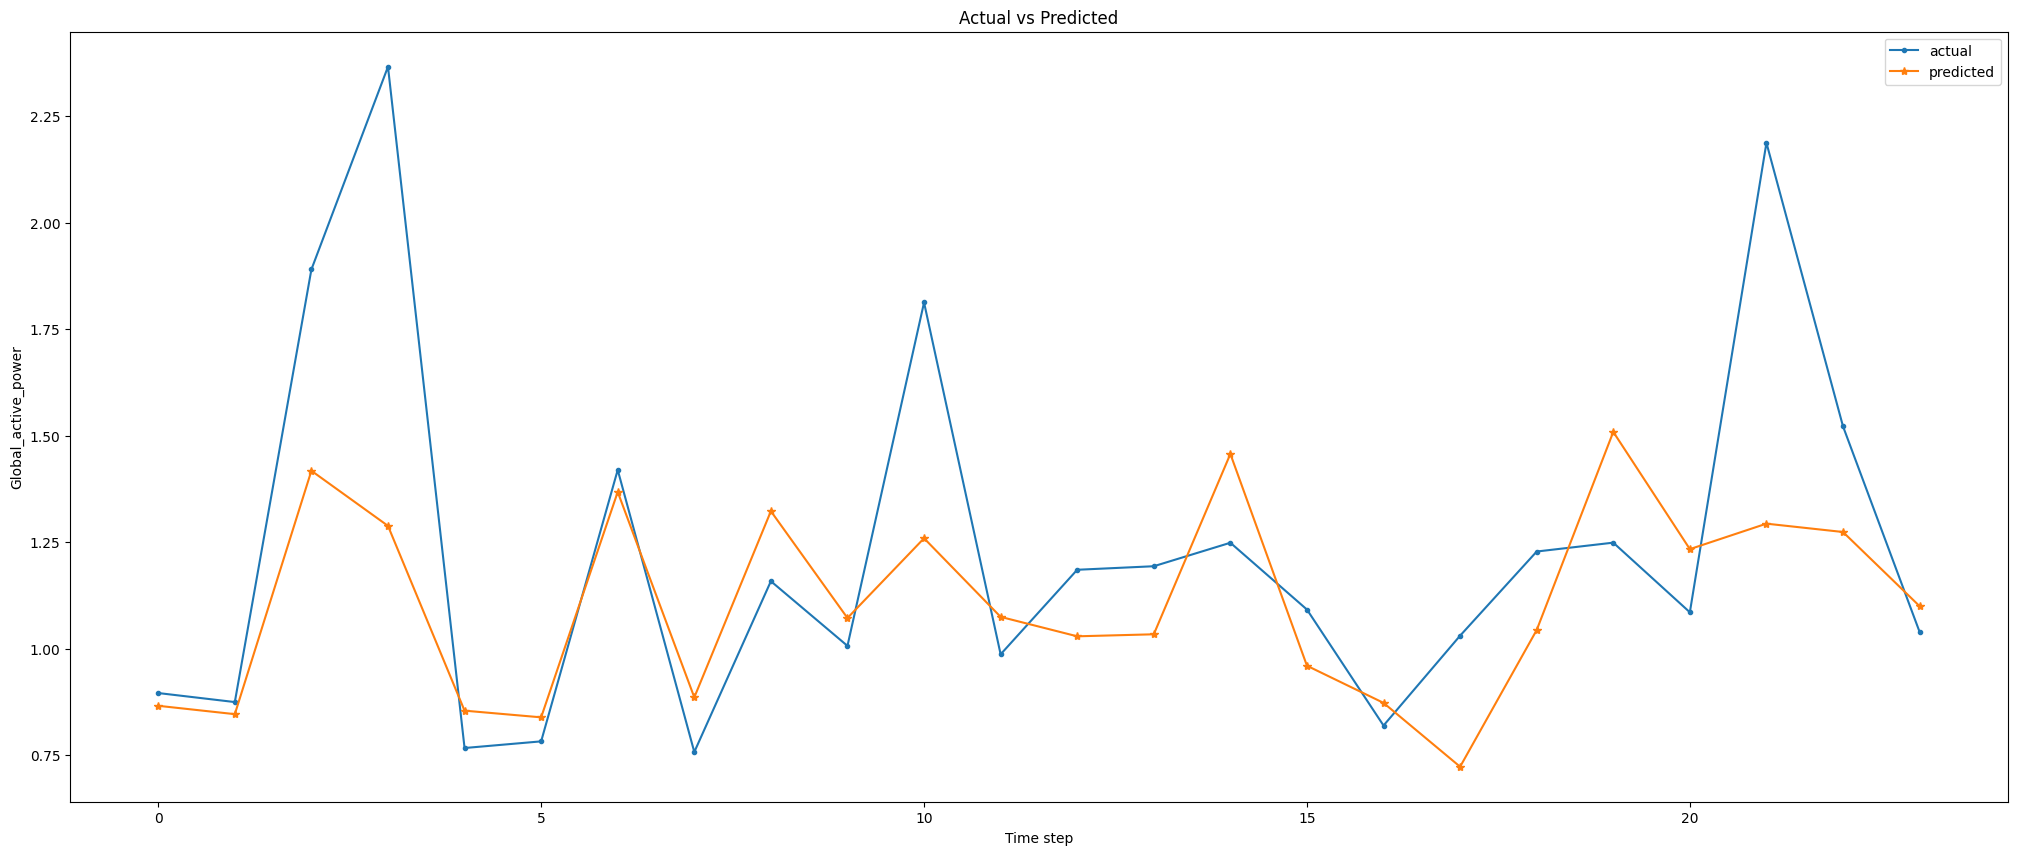

In [ ]:
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(Y_test)), Y_test[:], marker=".", label="actual")
plt.plot(range(len(Y_test)), lstm_model.predict(X_test[:]), marker="*", label="predicted")
plt.legend()
plt.show()

# LSTM model trained on Household Power Consumption Dataset with 9 day lookback

In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
print(df_resample.shape)
print(df_resample.head())

(1442, 7)
            Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467

In [ ]:
electricityDf.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [ ]:
df_resample.head()

Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361        0.000000        1.838889        9.765972

In [ ]:
def lookback(data, lookback_days=9, verbose= False):
  from datetime import datetime, timedelta
  X = []
  Y = []
  lookback_str = None

  # for index, row in data.iterrows():
  for i in range(0, len(data), lookback_days):
    slicer = data.iloc[i:i+lookback_days+1]
    date = slicer.index[0]
    print(date)
    lookback = [date + timedelta(days=day_ago) for day_ago in range(0, lookback_days+1)]
    lookback_str = [i.strftime('%Y-%m-%d %H:%M:%S') for i in lookback]
    try:
      slice_x = data.loc[lookback_str[0]: lookback_str[-2]]
      slice_x_cols = slice_x.columns
      if len(slice_x) == lookback_days:
        X.append(slice_x[slice_x_cols[1:]].to_numpy())
        Y.append(data.loc[lookback_str[-1]][slice_x_cols[0]])
      print(len(slice_x))
    except:
      pass

  return X, Y

In [ ]:
X, Y = lookback(df_resample)

2006-12-16 00:00:00
9
2006-12-25 00:00:00
9
2007-01-03 00:00:00
9
2007-01-12 00:00:00
9
2007-01-21 00:00:00
9
2007-01-30 00:00:00
9
2007-02-08 00:00:00
9
2007-02-17 00:00:00
9
2007-02-26 00:00:00
9
2007-03-07 00:00:00
9
2007-03-16 00:00:00
9
2007-03-25 00:00:00
9
2007-04-03 00:00:00
9
2007-04-12 00:00:00
9
2007-04-21 00:00:00
9
2007-04-30 00:00:00
9
2007-05-09 00:00:00
9
2007-05-18 00:00:00
9
2007-05-27 00:00:00
9
2007-06-05 00:00:00
9
2007-06-14 00:00:00
9
2007-06-23 00:00:00
9
2007-07-02 00:00:00
9
2007-07-11 00:00:00
9
2007-07-20 00:00:00
9
2007-07-29 00:00:00
9
2007-08-07 00:00:00
9
2007-08-16 00:00:00
9
2007-08-25 00:00:00
9
2007-09-03 00:00:00
9
2007-09-12 00:00:00
9
2007-09-21 00:00:00
9
2007-09-30 00:00:00
9
2007-10-09 00:00:00
9
2007-10-18 00:00:00
9
2007-10-27 00:00:00
9
2007-11-05 00:00:00
9
2007-11-14 00:00:00
9
2007-11-23 00:00:00
9
2007-12-02 00:00:00
9
2007-12-11 00:00:00
9
2007-12-20 00:00:00
9
2007-12-29 00:00:00
9
2008-01-07 00:00:00
9
2008-01-16 00:00:00
9
2008-01-25

In [ ]:
from copy import deepcopy
X_raw = deepcopy(X)
Y_raw = deepcopy(Y)

In [ ]:
import numpy as np
X = np.array(X_raw)
Y = np.array(Y_raw)

###Split into training and test sets

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

time_steps = X.shape[1]
number_of_rows = X.shape[0]
number_of_columns = X.shape[2]

scaler = MinMaxScaler((0, 1))

X_flatten = X.reshape(number_of_rows*time_steps, number_of_columns)

X = scaler.fit_transform(X_flatten)
X = X.reshape(number_of_rows, time_steps, number_of_columns)
SEED = 50
# Splitting the data by a percentage
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.2)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape)

(128, 9, 6) (128,) (16, 9, 6) (16,) (16, 9, 6) (16,)


### Define the LSTM model architecture

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(Dropout(0.10))
    m1.add(Dense(1))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

### Train the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_By_Hour/lstm_model_9_day_lookback'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='9_day_lookback_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val,Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               42800     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4/4 - 2s - loss: 1.1788 - root_mean_squared_error: 1.0857 - val_loss: 0.9555 - val_root_mean_squared_error: 0.9775 - 2s/epoch - 421ms/step
Epoch 2/100
4/4 - 0s - loss: 0.8721 - root_mean_squared_error: 0.9339 - val_loss: 0.6588 - val_root_mean_squared_error: 0.8117 - 70ms/epoch - 18ms/step
Epoch 

In [ ]:
rmse_train = np.sqrt(mean_squared_error(Y_train, lstm_model.predict(X_train)))
print(rmse_train)

4/4 [==============================] - 0s 3ms/step
0.26743030161991715


In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test, lstm_model.predict(X_test)))
print(rmse)

1/1 [==============================] - 0s 154ms/step
0.41133274215549737


In [ ]:
lstm_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 26ms/step - loss: 0.1692 - root_mean_squared_error: 0.4113


[0.16919463872909546, 0.41133275628089905]

### From the above code cells,
#### Train RMSE = 0.2674
#### Validation RMSE = 0.2744
#### Test RMSE = 0.4113

In [ ]:
lookback_train_rmse.append(rmse_train)
lookback_test_rmse.append(rmse)

### Plot the graph of learned and actual labels in testing stage

1/1 [==============================] - 0s 21ms/step


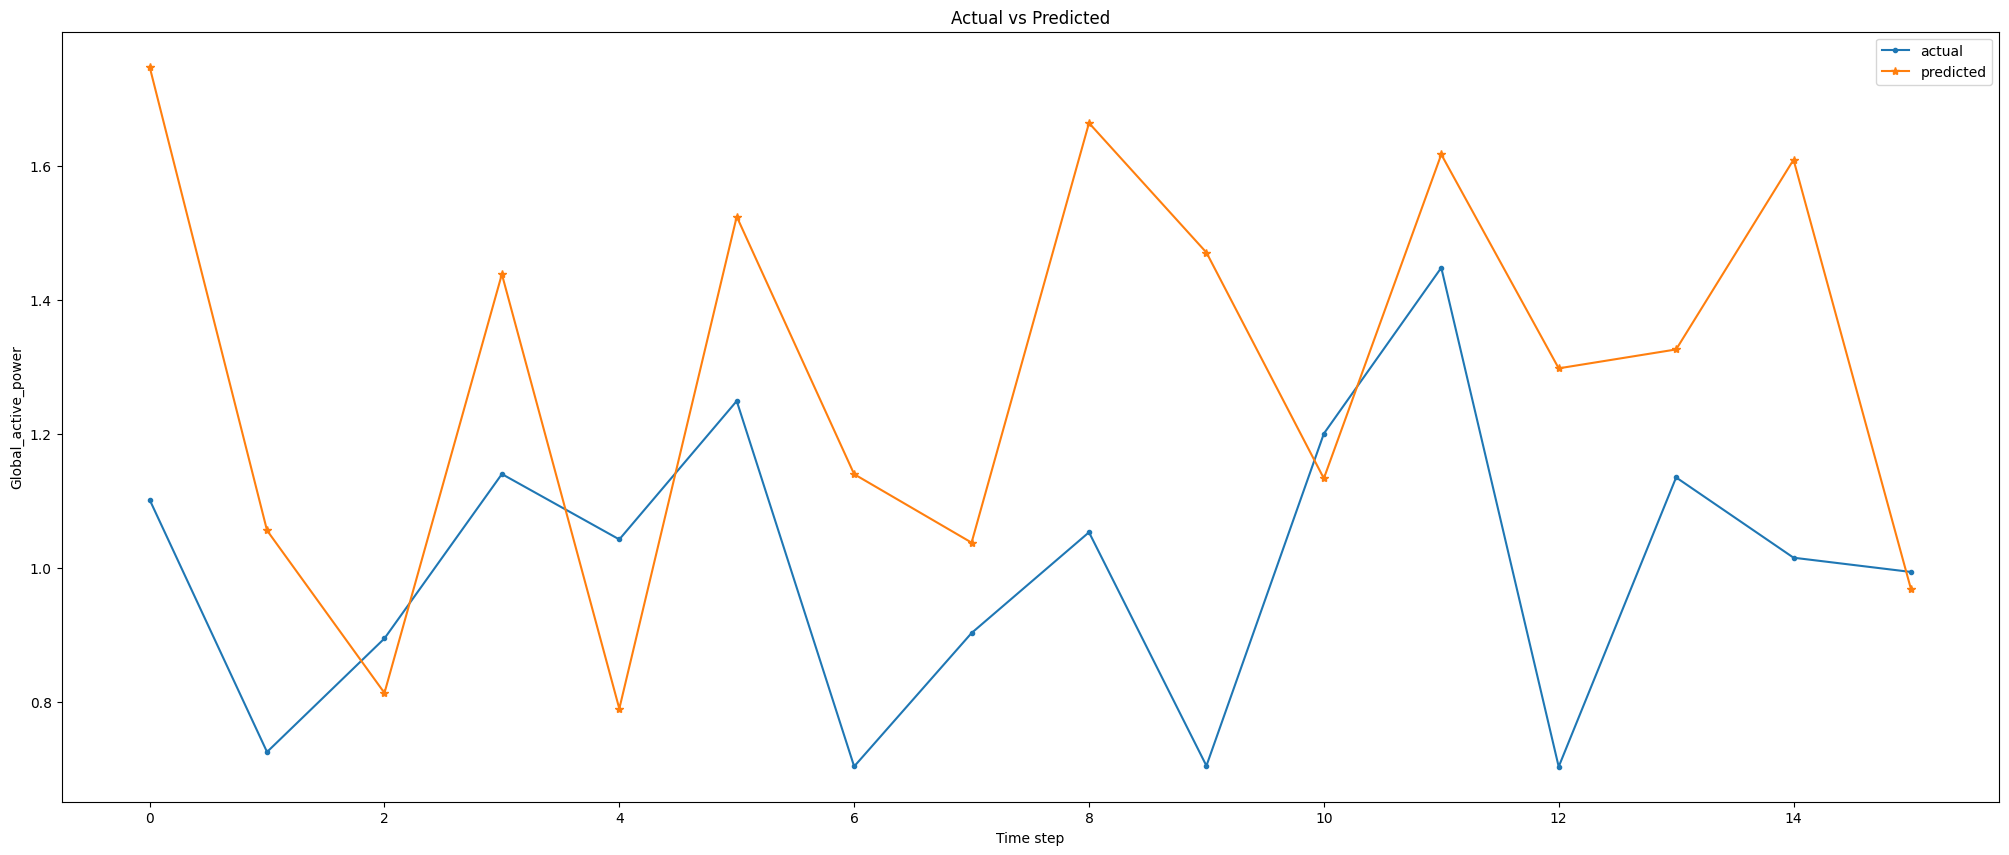

In [ ]:
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(Y_test)), Y_test[:], marker=".", label="actual")
plt.plot(range(len(Y_test)), lstm_model.predict(X_test[:]), marker="*", label="predicted")
plt.legend()
plt.show()

# LSTM model trained on Household Power Consumption Dataset with 12 day lookback

In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
print(df_resample.shape)
print(df_resample.head())

(1442, 7)
            Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467

In [ ]:
electricityDf.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [ ]:
df_resample.head()

Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361        0.000000        1.838889        9.765972

In [ ]:
def lookback(data, lookback_days=12, verbose= False):
  from datetime import datetime, timedelta
  X = []
  Y = []
  lookback_str = None

  # for index, row in data.iterrows():
  for i in range(0, len(data), lookback_days):
    slicer = data.iloc[i:i+lookback_days+1]
    date = slicer.index[0]
    print(date)
    lookback = [date + timedelta(days=day_ago) for day_ago in range(0, lookback_days+1)]
    lookback_str = [i.strftime('%Y-%m-%d %H:%M:%S') for i in lookback]
    try:
      slice_x = data.loc[lookback_str[0]: lookback_str[-2]]
      slice_x_cols = slice_x.columns
      if len(slice_x) == lookback_days:
        X.append(slice_x[slice_x_cols[1:]].to_numpy())
        Y.append(data.loc[lookback_str[-1]][slice_x_cols[0]])
      print(len(slice_x))
    except:
      pass

  return X, Y

In [ ]:
X, Y = lookback(df_resample)

2006-12-16 00:00:00
12
2006-12-28 00:00:00
12
2007-01-09 00:00:00
12
2007-01-21 00:00:00
12
2007-02-02 00:00:00
12
2007-02-14 00:00:00
12
2007-02-26 00:00:00
12
2007-03-10 00:00:00
12
2007-03-22 00:00:00
12
2007-04-03 00:00:00
12
2007-04-15 00:00:00
12
2007-04-27 00:00:00
12
2007-05-09 00:00:00
12
2007-05-21 00:00:00
12
2007-06-02 00:00:00
12
2007-06-14 00:00:00
12
2007-06-26 00:00:00
12
2007-07-08 00:00:00
12
2007-07-20 00:00:00
12
2007-08-01 00:00:00
12
2007-08-13 00:00:00
12
2007-08-25 00:00:00
12
2007-09-06 00:00:00
12
2007-09-18 00:00:00
12
2007-09-30 00:00:00
12
2007-10-12 00:00:00
12
2007-10-24 00:00:00
12
2007-11-05 00:00:00
12
2007-11-17 00:00:00
12
2007-11-29 00:00:00
12
2007-12-11 00:00:00
12
2007-12-23 00:00:00
12
2008-01-04 00:00:00
12
2008-01-16 00:00:00
12
2008-01-28 00:00:00
12
2008-02-09 00:00:00
12
2008-02-21 00:00:00
12
2008-03-04 00:00:00
12
2008-03-16 00:00:00
12
2008-03-28 00:00:00
12
2008-04-09 00:00:00
12
2008-04-21 00:00:00
12
2008-05-03 00:00:00
12
2008-05-15 

In [ ]:
from copy import deepcopy
X_raw = deepcopy(X)
Y_raw = deepcopy(Y)

In [ ]:
import numpy as np
X = np.array(X_raw)
Y = np.array(Y_raw)

###Split into training and test sets

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

time_steps = X.shape[1]
number_of_rows = X.shape[0]
number_of_columns = X.shape[2]

scaler = MinMaxScaler((0, 1))

X_flatten = X.reshape(number_of_rows*time_steps, number_of_columns)

X = scaler.fit_transform(X_flatten)
X = X.reshape(number_of_rows, time_steps, number_of_columns)
SEED = 50
# Splitting the data by a percentage
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.2)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape)

(96, 12, 6) (96,) (12, 12, 6) (12,) (12, 12, 6) (12,)


### Define the LSTM model architecture

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(Dropout(0.10))
    m1.add(Dense(1))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

### Train the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_By_Hour/lstm_model_12_day_lookback'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='12_day_lookback_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val,Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               42800     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
3/3 - 3s - loss: 0.9925 - root_mean_squared_error: 0.9962 - val_loss: 0.7019 - val_root_mean_squared_error: 0.8378 - 3s/epoch - 1s/step
Epoch 2/100
3/3 - 0s - loss: 0.7636 - root_mean_squared_error: 0.8738 - val_loss: 0.4823 - val_root_mean_squared_error: 0.6945 - 67ms/epoch - 22ms/step
Epoch 3/1

In [ ]:
rmse_train = np.sqrt(mean_squared_error(Y_train, lstm_model.predict(X_train)))
print(rmse_train)

3/3 [==============================] - 0s 5ms/step
0.29086440126380647


In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test, lstm_model.predict(X_test)))
print(rmse)

1/1 [==============================] - 0s 145ms/step
0.4194826721591399


In [ ]:
lstm_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 25ms/step - loss: 0.0585 - root_mean_squared_error: 0.2418


[0.05846467986702919, 0.24179470539093018]

### From the above code cells,
#### Train RMSE = 0.2909
#### Validation RMSE = 0.1805
#### Test RMSE = 0.4195

In [ ]:
lookback_train_rmse.append(rmse_train)
lookback_test_rmse.append(rmse)

### Plot the graph of learned and actual labels in testing stage

1/1 [==============================] - 0s 21ms/step


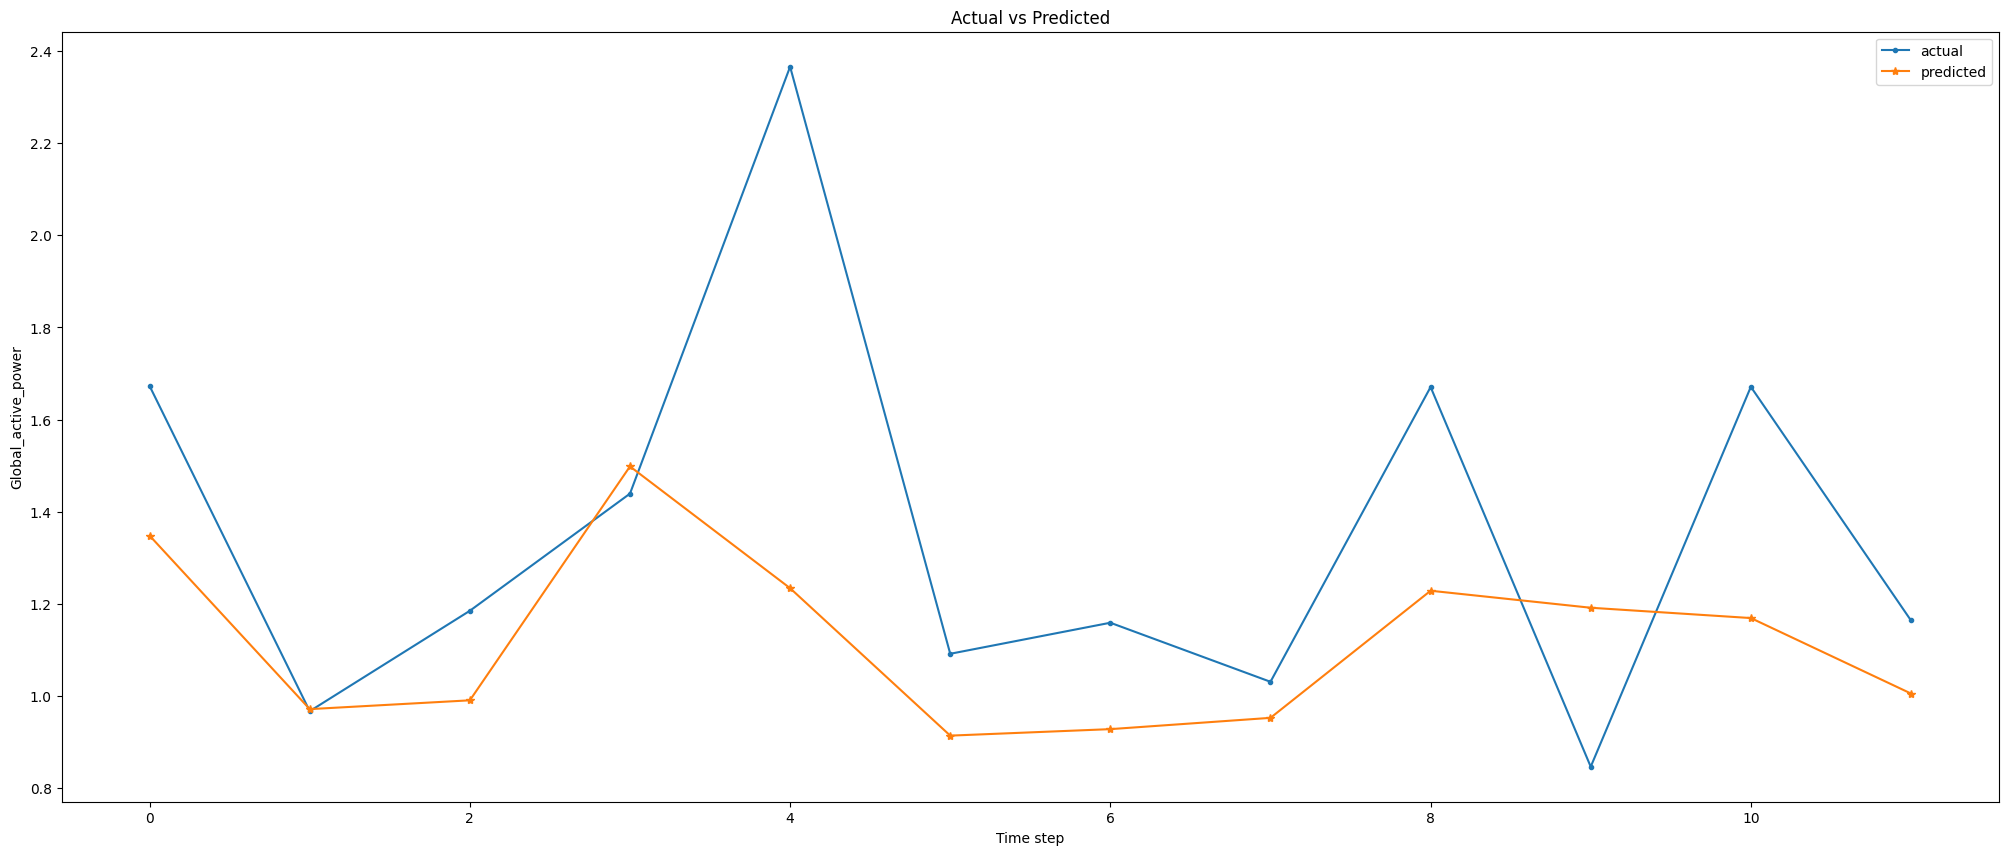

In [ ]:
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(Y_test)), Y_test[:], marker=".", label="actual")
plt.plot(range(len(Y_test)), lstm_model.predict(X_test[:]), marker="*", label="predicted")
plt.legend()
plt.show()

# LSTM model trained on Household Power Consumption Dataset with 15 day lookback

In [ ]:
import pandas as pd

# load all data
electricityDf = pd.read_csv('household_power_consumption.txt', sep=';', header=0,
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')# summarize
print(electricityDf.shape)
print(electricityDf.head())

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28

In [ ]:
electricityDf.replace(['nan','?'], inplace=True)

In [ ]:
electricityDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
electricityDf.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
electricityDf.shape

(2075259, 7)

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
electricityDf.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(electricityDf.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not electricityDf.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        electricityDf.iloc[:,j]=electricityDf.iloc[:,j].fillna(electricityDf.iloc[:,j].mean())

In [ ]:
electricityDf.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384178e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.800000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [ ]:
# resampling of data over hour
df_resample = electricityDf.resample('D').mean()
df_resample.shape

(1442, 7)

In [ ]:
print(df_resample.shape)
print(df_resample.head())

(1442, 7)
            Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467

In [ ]:
electricityDf.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [ ]:
df_resample.head()

Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361        0.000000        1.838889        9.765972

In [ ]:
def lookback(data, lookback_days=15, verbose= False):
  from datetime import datetime, timedelta
  X = []
  Y = []
  lookback_str = None

  # for index, row in data.iterrows():
  for i in range(0, len(data), lookback_days):
    slicer = data.iloc[i:i+lookback_days+1]
    date = slicer.index[0]
    print(date)
    lookback = [date + timedelta(days=day_ago) for day_ago in range(0, lookback_days+1)]
    lookback_str = [i.strftime('%Y-%m-%d %H:%M:%S') for i in lookback]
    try:
      slice_x = data.loc[lookback_str[0]: lookback_str[-2]]
      slice_x_cols = slice_x.columns
      if len(slice_x) == lookback_days:
        X.append(slice_x[slice_x_cols[1:]].to_numpy())
        Y.append(data.loc[lookback_str[-1]][slice_x_cols[0]])
      print(len(slice_x))
    except:
      pass

  return X, Y

In [ ]:
X, Y = lookback(df_resample)

2006-12-16 00:00:00
15
2006-12-31 00:00:00
15
2007-01-15 00:00:00
15
2007-01-30 00:00:00
15
2007-02-14 00:00:00
15
2007-03-01 00:00:00
15
2007-03-16 00:00:00
15
2007-03-31 00:00:00
15
2007-04-15 00:00:00
15
2007-04-30 00:00:00
15
2007-05-15 00:00:00
15
2007-05-30 00:00:00
15
2007-06-14 00:00:00
15
2007-06-29 00:00:00
15
2007-07-14 00:00:00
15
2007-07-29 00:00:00
15
2007-08-13 00:00:00
15
2007-08-28 00:00:00
15
2007-09-12 00:00:00
15
2007-09-27 00:00:00
15
2007-10-12 00:00:00
15
2007-10-27 00:00:00
15
2007-11-11 00:00:00
15
2007-11-26 00:00:00
15
2007-12-11 00:00:00
15
2007-12-26 00:00:00
15
2008-01-10 00:00:00
15
2008-01-25 00:00:00
15
2008-02-09 00:00:00
15
2008-02-24 00:00:00
15
2008-03-10 00:00:00
15
2008-03-25 00:00:00
15
2008-04-09 00:00:00
15
2008-04-24 00:00:00
15
2008-05-09 00:00:00
15
2008-05-24 00:00:00
15
2008-06-08 00:00:00
15
2008-06-23 00:00:00
15
2008-07-08 00:00:00
15
2008-07-23 00:00:00
15
2008-08-07 00:00:00
15
2008-08-22 00:00:00
15
2008-09-06 00:00:00
15
2008-09-21 

In [ ]:
from copy import deepcopy
X_raw = deepcopy(X)
Y_raw = deepcopy(Y)

In [ ]:
import numpy as np
X = np.array(X_raw)
Y = np.array(Y_raw)

###Split into training and test sets

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

time_steps = X.shape[1]
number_of_rows = X.shape[0]
number_of_columns = X.shape[2]

scaler = MinMaxScaler((0, 1))

X_flatten = X.reshape(number_of_rows*time_steps, number_of_columns)

X = scaler.fit_transform(X_flatten)
X = X.reshape(number_of_rows, time_steps, number_of_columns)
SEED = 50
# Splitting the data by a percentage
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.2)
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=0.5)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape)

(76, 15, 6) (76,) (10, 15, 6) (10,) (10, 15, 6) (10,)


### Define the LSTM model architecture

In [ ]:
from tensorflow import keras
from keras.models import Sequential, save_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_model_as_m1(t_steps, n_columns):
    m1 = Sequential()
    m1.add(LSTM(100, activation='relu', input_shape=(t_steps, n_columns)))
    m1.add(Dropout(0.10))
    m1.add(Dense(1))
    print(m1.summary())

    m1.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    return m1

### Train the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error


# batch_size = 128
time_steps = X_train.shape[1]
number_of_rows = X_train.shape[0]
number_of_columns = X_train.shape[2]

model_path = '/content/drive/MyDrive/LSTM_By_Hour/lstm_model_15_day_lookback'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='15_day_lookback_model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
rmse = []
lstm_model = create_model_as_m1(time_steps, number_of_columns)
hist = lstm_model.fit(X_train, Y_train, epochs=100, validation_data=(X_val,Y_val), callbacks=my_callbacks, verbose=2)
lstm_model.save(model_path)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               42800     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
3/3 - 2s - loss: 1.4430 - root_mean_squared_error: 1.2013 - val_loss: 1.1973 - val_root_mean_squared_error: 1.0942 - 2s/epoch - 685ms/step
Epoch 2/100
3/3 - 0s - loss: 1.2447 - root_mean_squared_error: 1.1157 - val_loss: 1.0218 - val_root_mean_squared_error: 1.0108 - 122ms/epoch - 41ms/step
Epoch

In [ ]:
rmse_train = np.sqrt(mean_squared_error(Y_train, lstm_model.predict(X_train)))
print(rmse_train)

3/3 [==============================] - 0s 5ms/step
0.3336066255070287


In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test, lstm_model.predict(X_test)))
print(rmse)

1/1 [==============================] - 0s 21ms/step
0.5489518187884671


In [ ]:
lstm_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 27ms/step - loss: 0.3013 - root_mean_squared_error: 0.5490


[0.30134811997413635, 0.5489518046379089]

### From the above code cells,
#### Train RMSE = 0.3336
#### Validation RMSE = 0.1830
#### Test RMSE = 0.5490

In [ ]:
lookback_train_rmse.append(rmse_train)
lookback_test_rmse.append(rmse)

### Plot the graph of learned and actual labels in testing stage

1/1 [==============================] - 0s 29ms/step


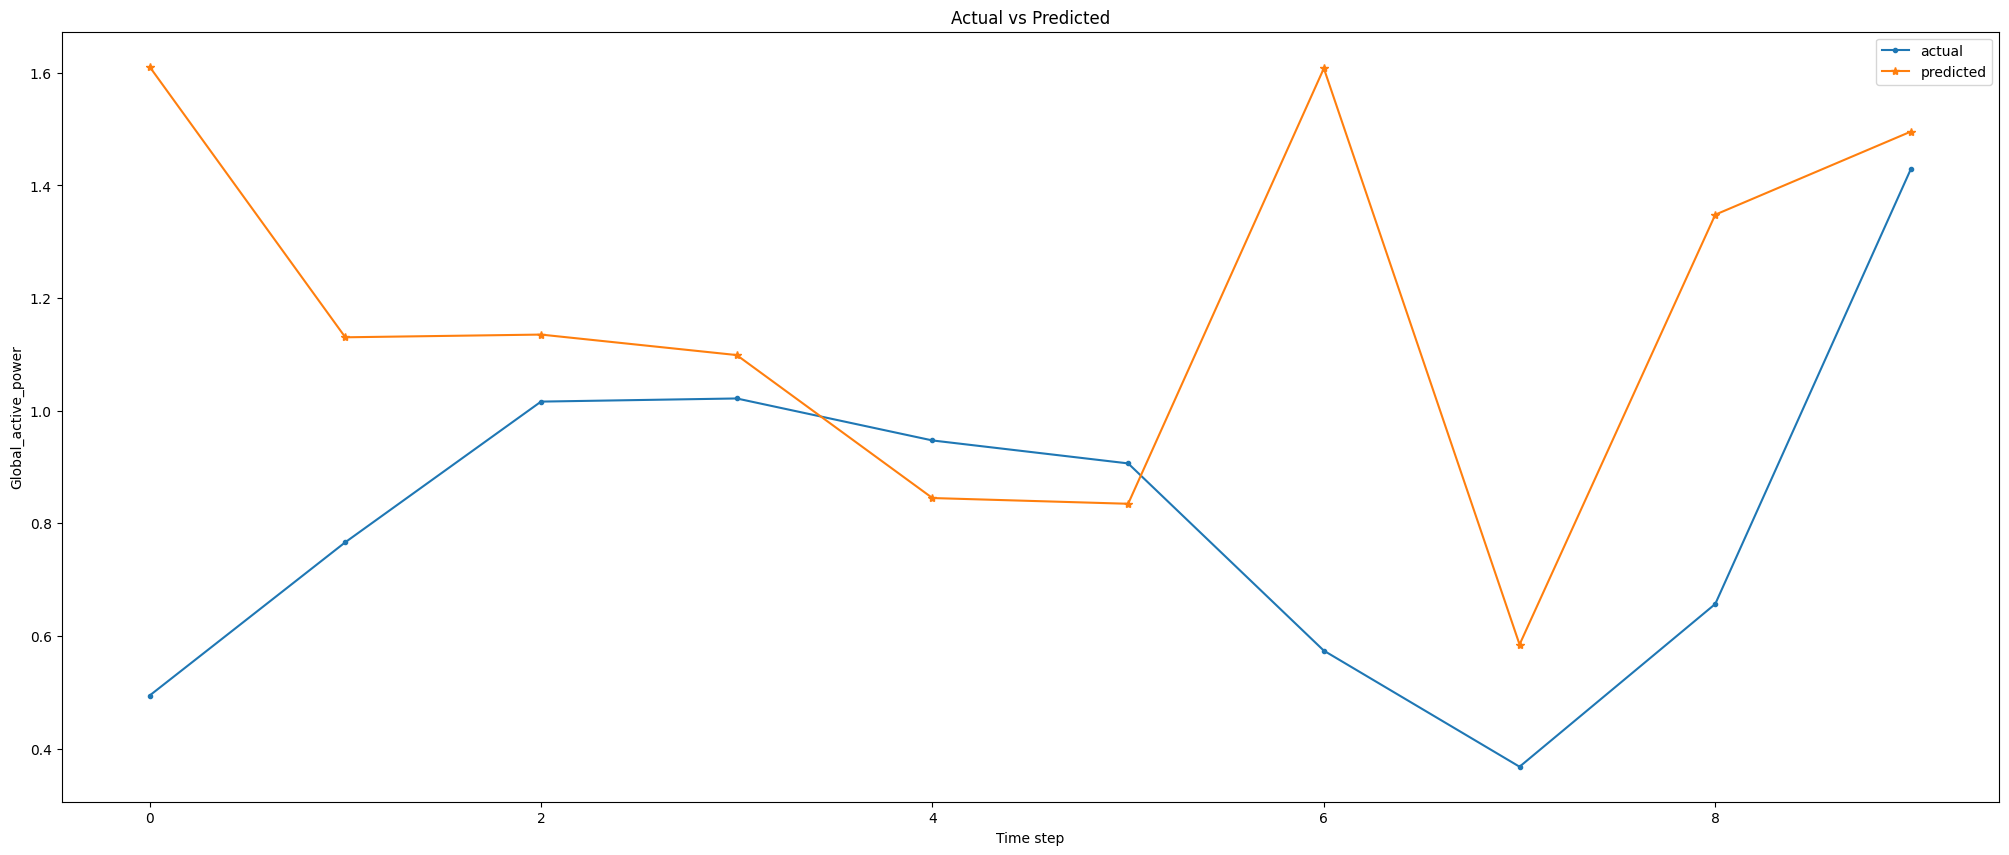

In [ ]:
plt.figure(figsize=(25, 10))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.title("Actual vs Predicted")
plt.plot(range(len(Y_test)), Y_test[:], marker=".", label="actual")
plt.plot(range(len(Y_test)), lstm_model.predict(X_test[:]), marker="*", label="predicted")
plt.legend()
plt.show()

### Lookback steps vs RMSE (Train and Test)

In [ ]:
lookback_train_rmse

[0.3201036735394285,
 0.31015509925657103,
 0.26743030161991715,
 0.29086440126380647,
 0.3336066255070287]

In [ ]:
lookback_test_rmse

[0.3180864303014828,
 0.35116509741805046,
 0.41133274215549737,
 0.4194826721591399,
 0.5489518187884671]

In [ ]:
lookback = [1,3,6,9,12,15]
lookback_train_rmse.insert(0,0.0996596089717028)
lookback_test_rmse.insert(0,0.08074901281937491)

In [ ]:
lookback = [1,3,6,9,12,15]
lookback_train_rmse = [0.0996596089717028, 0.3201036735394285, 0.31015509925657103, 0.26743030161991715, 0.29086440126380647, 0.3336066255070287]
lookback_test_rmse = [0.08074901281937491, 0.3180864303014828, 0.35116509741805046, 0.41133274215549737, 0.4194826721591399, 0.5489518187884671]

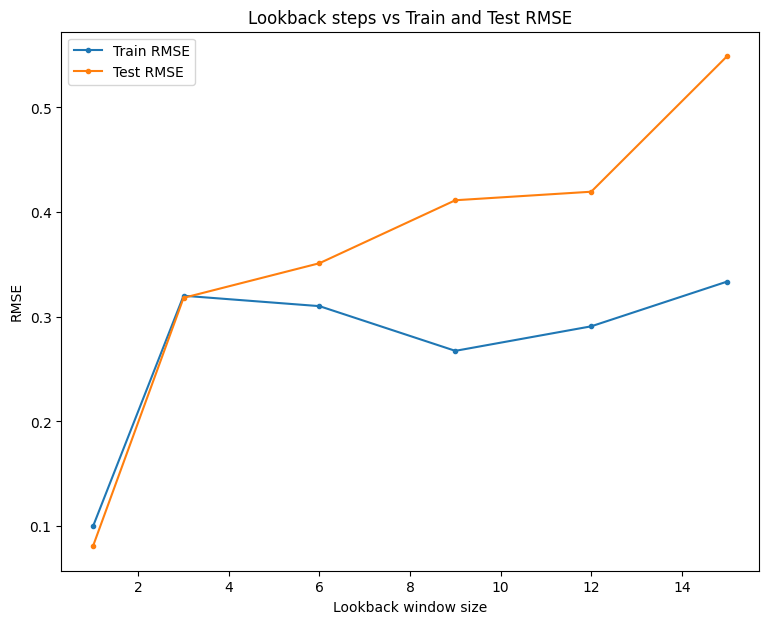

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
plt.ylabel('RMSE')
plt.xlabel('Lookback window size')
plt.title("Lookback steps vs Train and Test RMSE")
plt.plot(lookback, lookback_train_rmse[:], marker=".", label="Train RMSE")
plt.plot(lookback, lookback_test_rmse[:], marker=".", label="Test RMSE")
plt.legend()
plt.show()